In [96]:
import pandas as pd
import cPickle
from bs4 import BeautifulSoup, Comment
import datetime
from matplotlib import pyplot as plt
from matplotlib import cm
import numpy as np
import seaborn as sns
from IPython.display import Image
from IPython.core.display import HTML 

%matplotlib inline

In [97]:
df = cPickle.load(open('assets/big_df.p', 'rb'))

In [98]:
len(df)

18668

In [99]:
df.head(2)

,name,cuisine,blurb,num_words,high_price,low_price,currency,distinctions,photos,photo_count,add_info,latitude,longitude,comments,num_comments,special_comment
0,Bellevue,Catalan,Now here is a delicious find! The menu positiv...,46,58,32.0,EUR,"[[bib-gourmand], [standing-13]]",[https://download.viamichelin.com/media/image/...,6,"[Lunch 20 €, Menu 32/56 € - Carte 45/58 €, Mea...",42.40434,2.479931,"[[if lt IE 9]> <script src=""/1.83.0/js/old-ie...",7,
1,L'Ermitage,Traditional,This beautifully restored old barn has retaine...,37,62,28.0,EUR,"[[assiette], [standing-13]]",[https://download.viamichelin.com/media/image2...,1,"[Lunch 21 €, Menu 28 € (weekdays), 38/60 € - C...",45.05346,3.855776,"[[if lt IE 9]> <script src=""/1.83.0/js/old-ie...",7,


In [100]:
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1873, 1874, 1875,    0,    1,    2,    3,    4,    5,    6],
           dtype='int64', length=18668)

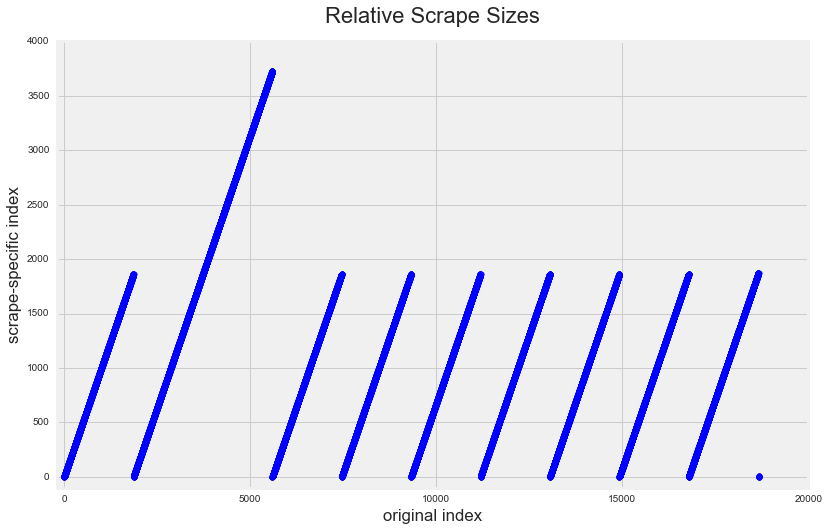

In [101]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

plt.scatter(range(0, len(df)), df.index, color = 'blue', \
            alpha = 1, s = 30, label = 'included')

plt.title('Relative Scrape Sizes', fontsize = 22, y = 1.03)

# y label
plt.ylabel('scrape-specific index')

# x label
plt.xlabel('original index')

# set the figure boundaries
plt.ylim([-100, 4000])
plt.xlim([-200, 20000])
plt.grid(True)
#plt.legend(loc='center right', fontsize = 8)

plt.show()

In [102]:
df = df.reset_index(drop = True)

In [103]:
df.isnull().sum()

name                 7
cuisine              9
blurb                7
num_words            0
high_price           7
low_price            7
currency             7
distinctions         7
photos               0
photo_count          0
add_info             7
latitude             7
longitude            7
comments           459
num_comments         0
special_comment    459
dtype: int64

In [104]:
df[df['cuisine'].isnull()][['name', 'cuisine', 'blurb', 'currency', 'distinctions']]

,name,cuisine,blurb,currency,distinctions
1686,None,None,None,None,None
3475,None,None,None,None,None
5122,None,None,None,None,None
15338,None,None,None,None,None
16273,None,None,None,None,None
17939,Lor 9 Beef Kway Teow,None,Beef Kway Teow is their very popular signature...,SGD,[]
18013,Nasi Lemak Kukus,None,The flavoursome Nasi Lemak comes with a wide s...,SGD,[]
18147,None,None,None,None,None
18665,None,None,None,None,None


Drop all, including the two with no cuisine listed, since we don't want to guess whether it should be Singaporean or street food or meats or whatever.

In [105]:
df = df.drop(df.index[[1686, 3475, 5122, 15338, 16273, 17939, 18013, 18147, 18665]])
df = df.reset_index(drop = True)

In [106]:
df.isnull().sum()

name                 0
cuisine              0
blurb                0
num_words            0
high_price           0
low_price            0
currency             0
distinctions         0
photos               0
photo_count          0
add_info             0
latitude             0
longitude            0
comments           459
num_comments         0
special_comment    459
dtype: int64

In [107]:
df.dtypes

name                object
cuisine             object
blurb               object
num_words            int64
high_price          object
low_price          float64
currency            object
distinctions        object
photos              object
photo_count          int64
add_info            object
latitude           float64
longitude          float64
comments            object
num_comments         int64
special_comment     object
dtype: object

In [108]:
df['num_comments'].value_counts()

7    18200
0      459
Name: num_comments, dtype: int64

In [110]:
comment_set = []
for i in range(len(df)):
    if df['comments'][i]:
        for j in df['comments'][i]:
            if j in comment_set:
                continue
            else:
                 comment_set.append(j)
    else:
        continue
        
        
count = 0
for i in comment_set:
    print '\n'
    print str(i)
    print '--------------------------------------------------'
    count += 1



[if lt IE 9]>
	<script src="/1.83.0/js/old-ie.js"></script>
	<![endif]
--------------------------------------------------


[if IE 8]>
<body id="content" class="ie ie8 en"> <![endif]
--------------------------------------------------


[if IE 9]>
<body id="content" class="ie ie9 en"> <![endif]
--------------------------------------------------


[if gt IE 9]><!
--------------------------------------------------


<![endif]
--------------------------------------------------




--------------------------------------------------


 JSE and apijs 
--------------------------------------------------



					<p>
						<span class="interesting-wine-list"></span>
						Excellent wine list.
					</p>
			
--------------------------------------------------


[if IE 8]>
<body id="content" class="ie ie8 fr_FR"> <![endif]
--------------------------------------------------


[if IE 9]>
<body id="content" class="ie ie9 fr_FR"> <![endif]
--------------------------------------------------



					<p>


In [111]:
comment_set

[u'[if lt IE 9]>\n\t<script src="/1.83.0/js/old-ie.js"></script>\n\t<![endif]',
 u'[if IE 8]>\n<body id="content" class="ie ie8 en"> <![endif]',
 u'[if IE 9]>\n<body id="content" class="ie ie9 en"> <![endif]',
 u'[if gt IE 9]><!',
 u'<![endif]',
 u'\n',
 u' JSE and apijs ',
 u'\n\t\t\t\t\t<p>\n\t\t\t\t\t\t<span class="interesting-wine-list"></span>\n\t\t\t\t\t\tExcellent wine list.\n\t\t\t\t\t</p>\n\t\t\t',
 u'[if IE 8]>\n<body id="content" class="ie ie8 fr_FR"> <![endif]',
 u'[if IE 9]>\n<body id="content" class="ie ie9 fr_FR"> <![endif]',
 u'\n\t\t\t\t\t<p>\n\t\t\t\t\t\t<span class="interesting-wine-list"></span>\n\t\t\t\t\t\tBelle carte des vins.\n\t\t\t\t\t</p>\n\t\t\t']

In [112]:
src_dummy = []
for i in range(len(df)):
    if df['comments'][i]:
        for j in df['comments'][i]:
            count = 0
            if '/1.83.0/js/old-ie.js' in j:
                src_dummy.append(1)
                break
            else:
                if count == len(j):
                    src_dummy.append(0)
                    break
                else:
                    count += 1
                    continue
    else:
        src_dummy.append(0)

print len(src_dummy)
df['old-ie.js'] = src_dummy

18659


In [113]:
df['special_comment'].value_counts()


                                                                                                        15395

					<p>
						<span class="interesting-wine-list"></span>
						Excellent wine list.
					</p>
			      2601

					<p>
						<span class="interesting-wine-list"></span>
						Belle carte des vins.
					</p>
			      204
Name: special_comment, dtype: int64

Make indicator variable for "span class='wine-list'" and "wine in english" (vs french):

In [114]:
interesting_wine_all = []
french_minus_english_plus = []
for i in range(len(df)):
    if df['special_comment'][i]:
        interesting_wine_all.append(1)
    else:
        interesting_wine_all.append(0)
    if df['special_comment'][i]:
        if 'Excellent' in df['special_comment'][i]:
            french_minus_english_plus.append(1)
        elif 'Belle' in df['special_comment'][i]:
            french_minus_english_plus.append(-1)
        else:
            french_minus_english_plus.append(0)
    else:
        french_minus_english_plus.append(0)
        
if len(french_minus_english_plus) == len(interesting_wine_all) == len(df):
    df['english+french-'] = french_minus_english_plus
    df['span class=wine'] = interesting_wine_all
    
del df['special_comment']
del df['comments']
del df['num_comments']

In [115]:
print df['english+french-'].value_counts()
print '\n'
print df['span class=wine'].value_counts()

 0    15854
 1     2601
-1      204
Name: english+french-, dtype: int64


1    18200
0      459
Name: span class=wine, dtype: int64


In [116]:
def num_cat(x):
    '''This function returns a set containing all data types contained in the argument provided.'''
    cat_list = []
    for i in x:
        cat_list.append(type(i))
    return set(cat_list)

for column in df.columns:
    x = num_cat(df[column])
    print column
    print x
    print '\n'

name
set([<type 'str'>])


cuisine
set([<type 'str'>])


blurb
set([<type 'str'>])


num_words
set([<type 'numpy.int64'>])


high_price
set([<type 'int'>, <type 'float'>, <type 'str'>])


low_price
set([<type 'numpy.float64'>])


currency
set([<type 'str'>])


distinctions
set([<type 'list'>])


photos
set([<type 'list'>])


photo_count
set([<type 'numpy.int64'>])


add_info
set([<type 'list'>])


latitude
set([<type 'numpy.float64'>])


longitude
set([<type 'numpy.float64'>])


old-ie.js
set([<type 'numpy.int64'>])


english+french-
set([<type 'numpy.int64'>])


span class=wine
set([<type 'numpy.int64'>])




Let's check out why some of the high prices are strings:

In [117]:
count = 0
no_high_price = []
for i in range(len(df)):
    if not str(df['high_price'][i]):
        no_high_price.append(i)
        print df.ix[i,:][['name', 'cuisine', 'high_price', 'low_price', 'add_info']]
        print '\n'
        count += 1
    else:
        continue
            
count = 0
no_low_price = []
for i in range(len(df)):
    if not str(df['low_price'][i]):
        no_low_price.append(i)
        print df.ix[i,:][['name', 'cuisine', 'high_price', 'low_price', 'add_info']]
        print '\n'
        count += 1
    else:
        continue

name                                          Wagyu Kaiseki Den
cuisine                                                Japanese
high_price                                                     
low_price                                                  1980
add_info      [Dinner: set(HKD 1980), reservations required,...
Name: 9949, dtype: object


name                                                    Ryu Gin
cuisine                                                Japanese
high_price                                                     
low_price                                                  2180
add_info      [Dinner: set(HKD 2180), reservations required,...
Name: 9964, dtype: object


name                                               Sushi Shikon
cuisine                                                   Sushi
high_price                                                     
low_price                                                  3500
add_info      [Dinner: set(HKD 3500), reservatio

With some website checking, we know that these are tasting menus!  Some are lunch tasting prices, though, so we'll have to deal with lunch vs dinner soon, as well.  For now, impute same price in 'high_price' column: 

In [118]:
print 'indeces missing high_price: %s' %no_high_price
print '\n'
print 'indeces missing low_price: %s' %no_low_price

indeces missing high_price: [9949, 9964, 10008, 16383, 16384, 17988, 17992]


indeces missing low_price: []


In [121]:
df['high_price'][no_high_price[0]] = df['low_price'][no_high_price[0]]
df['high_price'][no_high_price[1]] = df['low_price'][no_high_price[1]]
df['high_price'][no_high_price[2]] = df['low_price'][no_high_price[2]]
df['high_price'][no_high_price[3]] = 448
df['high_price'][no_high_price[4]] = df['low_price'][no_high_price[4]]
df['high_price'][no_high_price[5]] = 298
df['high_price'][no_high_price[6]] = 380

In [126]:
df['high_price'] = df['high_price'].apply(lambda x: float(x))
df['photo_count'] = df['photo_count'].apply(lambda x: int(x))

In [127]:
df['low_price'].describe()

count    18659.000000
mean        55.218340
std        295.399641
min          2.000000
25%         24.000000
50%         30.000000
75%         42.000000
max      15390.000000
Name: low_price, dtype: float64

In [124]:
df['high_price'].describe()

count    18659.000000
mean       123.614127
std        828.646984
min          6.000000
25%         49.000000
50%         62.000000
75%         85.000000
max      57100.000000
Name: high_price, dtype: float64

Time for a currency conversion!

In [128]:
df['currency'].value_counts()

EUR    13005
GBP     2047
USD     1681
CHF      935
HKD      264
BRL      157
SGD      143
SEK      104
DKK       91
MOP       80
PLN       52
NOK       40
CZK       31
HUF       29
Name: currency, dtype: int64

Welp, let's use a dictionary of exchange rates:

In [130]:
## Google rates, 08/16/16

conversion_rate = {
    'EUR' : 0.89, 
    'GBP' : 1.30,  
    'USD' : 1,  
    'CHF' : 1.04,    
    'HKD' : 0.13,   
    'BRL' : 0.31,     
    'SGD' : 0.75,     
    'SEK' : 0.12,     
    'DKK' : 0.15,      
    'MOP' : 0.13,      
    'PLN' : 0.26,      
    'NOK' : 0.12, 
    'CZK' : 0.042,     
    'HUF' : 0.0036
    }

In [131]:
def get_avg_price(df):
    avg_price = []
    for i in range(len(df)):
        try:
            avg = (df['low_price'][i] + df['high_price'][i]) / 2
            avg_price.append(avg)
        except:
            avg_price.append(None)

    df['avg_price'] = avg_price
    return df


def get_USD(df):
    
    avg_USD = []

    count = -1

    start = datetime.datetime.now()
    print 'start time: %s \n' %start
    print 'proportion calculated so far:'

    for i in range(len(df)):
        count += 1
        try:
            avg = df['avg_price'][i] * conversion_rate[df['currency'][i]]
            avg_USD.append(round(avg,2))
            if avg == 0:
                print 'calculation issue at:\n%s' %df.ix[i,:] 

        except:    
            avg_USD.append(None)

        if count%1000 == 0:
            print round(float(count)/len(df), 2),
#         elif count == int(len(df)/2):
#             print '\n'
#             halftime = datetime.datetime.now()
#             print 'halfway!! it\'s only taken %s so far... \n' %(halftime - start)

        else:
            continue


    df['avg_USD'] = avg_USD

    finish = datetime.datetime.now()
    print '\nfinish time: %s' %finish
    print '\nelapsed time: %s' %(finish - start)
    return df

def do_money_things(df):
    get_avg_price(df)
    get_USD(df)
    del df['avg_price']
    return df

In [132]:
df = do_money_things(df)

start time: 2016-08-17 13:37:28.736554 

proportion calculated so far:
0.0 0.05 0.11 0.16 0.21 0.27 0.32 0.38 0.43 0.48 0.54 0.59 0.64 0.7 0.75 0.8 0.86 0.91 0.96 
finish time: 2016-08-17 13:37:29.460768

elapsed time: 0:00:00.724214


In [133]:
df['avg_USD'].describe()

count    18659.000000
mean        49.840991
std         27.066963
min          1.950000
25%         35.160000
50%         42.250000
75%         56.960000
max        455.000000
Name: avg_USD, dtype: float64

Cheapest restaurant on the site:

In [137]:
df[df['avg_USD'] == 1.95][['name', 'cuisine', 'blurb', 'avg_USD']]

,name,cuisine,blurb,avg_USD
16327,Chong Shing,Street Food,Cantonese steamed buns.,1.95


In [138]:
df = pd.concat([df, pd.get_dummies(df['currency'])], axis = 1)

In [139]:
start = datetime.datetime.now()
print start
cPickle.dump(df, open('assets/big_df_postcurrexch.p', 'wb')) 
finish = datetime.datetime.now()
print 'done!  pickling took %s.' %(finish - start)

2016-08-17 13:39:11.654849
done!  pickling took 0:00:01.365222.


In [140]:
df = cPickle.load(open('assets/big_df_postcurrexch.p', 'rb'))

In [141]:
## mealtimes/prices, comments, address (use lat/lon in geopy instead), phone, email, website
count = 0
for i in df['add_info']:
    count += 1
    print 'index %s' %count
    print '======'
    for j in i:
        print j
    print '--------------\n'
    if count > 1:
        break

index 1
Lunch 20 €, Menu 32/56 € - Carte 45/58 €
Meals outside
Air conditioning
Enclosed car park
Address pl. du Foiral, 66230 Prats-de-Mollo-la-Preste
Phone +33468397248
Email info@hotel-le-bellevue.fr
Website: http://www.hotel-le-bellevue.fr
--------------

index 2
Lunch 21 €, Menu 28 € (weekdays), 38/60 € - Carte 36/62 €
booking advisable
Meals outside
Enclosed car park
Address 73 av. de l'Ermitage, 43000 Espaly-St-Marcel
Phone +33471040899
Email bruno.chartier@wanadoo.fr
--------------



Get a list of all distinct... distinctions:

In [142]:
distinction_set = []
for i in range(len(df)):
    for j in df['distinctions'][i]:
        if j in distinction_set:
            continue
        else:
             distinction_set.append(j)
distinction_set

[['bib-gourmand'],
 ['standing-13'],
 ['assiette'],
 ['star'],
 ['standing-19'],
 ['standing-21'],
 ['standing-14'],
 ['standing-12'],
 ['standing-20'],
 ['good-value-menu'],
 ['standing-15'],
 ['standing-18'],
 ['standing-17'],
 ['standing-16']]

In [143]:
def distinctify(df):

    standing = []
    for i in range(len(df)):
        if ['standing-12'] in df['distinctions'][i]:
            standing.append(12)
        elif ['standing-13'] in df['distinctions'][i]:
            standing.append(13)
        elif ['standing-14'] in df['distinctions'][i]:
            standing.append(14)
        elif ['standing-15'] in df['distinctions'][i]:
            standing.append(15)
        elif ['standing-16'] in df['distinctions'][i]:
            standing.append(16)
        elif ['standing-17'] in df['distinctions'][i]:
            standing.append(17)
        elif ['standing-18'] in df['distinctions'][i]:
            standing.append(18)
        elif ['standing-19'] in df['distinctions'][i]:
            standing.append(19)
        elif ['standing-20'] in df['distinctions'][i]:
            standing.append(20)
        elif ['standing-21'] in df['distinctions'][i]:
            standing.append(21)
        elif ['standing-22'] in df['distinctions'][i]:
            standing.append(22)
        else:
            standing.append(None)

    df['standing'] = standing




    bib = []
    for i in range(len(df)):
        if ['bib-gourmand'] in df['distinctions'][i]:
            bib.append(1)
        else:
            bib.append(0)

    df['bib'] = bib



    stars = []
    for i in range(len(df)):
        star_count = 0
        for starlet in df['distinctions'][i]:
            if starlet == ['star']:
                star_count += 1
        stars.append(star_count)

    df['stars'] = stars

    df['included'] = 0
    df['included'][(df['stars'] == 0) & (df['bib'] == 0)] = 1
    df['included'].value_counts()

    assiette = []
    for i in range(len(df)):
        if ['assiette'] in df['distinctions'][i]:
            assiette.append(1)
        else:
            assiette.append(0)

    df['assiette'] = assiette


    value_menu = []
    for i in range(len(df)):
        if ['good-value-menu'] in df['distinctions'][i]:
            value_menu.append(1)
        else:
            value_menu.append(0)

    df['value_menu'] = value_menu
    del df['distinctions']
    
    
    return df

In [145]:
df = distinctify(df)
cPickle.dump(df, open('assets/big_df_postdistinction.p', 'wb')) 

In [192]:
df = cPickle.load(open('assets/big_df_postdistinction.p', 'rb'))
df.columns

Index([u'name', u'cuisine', u'blurb', u'num_words', u'high_price',
       u'low_price', u'currency', u'photos', u'photo_count', u'add_info',
       u'latitude', u'longitude', u'old-ie.js', u'english+french-',
       u'span class=wine', u'avg_USD', u'BRL', u'CHF', u'CZK', u'DKK', u'EUR',
       u'GBP', u'HKD', u'HUF', u'MOP', u'NOK', u'PLN', u'SEK', u'SGD', u'USD',
       u'standing', u'bib', u'stars', u'included', u'assiette', u'value_menu'],
      dtype='object')

Assiette and plain inclusion in the Guide are distinct... distinctions:

In [193]:
print df['assiette'].value_counts()
print df['included'].value_counts()

0    15634
1     3025
Name: assiette, dtype: int64
1    13711
0     4948
Name: included, dtype: int64


In [194]:
name_len = []
for i in range(len(df)):
    name = df['name'][i]
    length = len(name)
    name_len.append(length)
    
df['name_len'] = name_len

In [195]:
df.columns

Index([u'name', u'cuisine', u'blurb', u'num_words', u'high_price',
       u'low_price', u'currency', u'photos', u'photo_count', u'add_info',
       u'latitude', u'longitude', u'old-ie.js', u'english+french-',
       u'span class=wine', u'avg_USD', u'BRL', u'CHF', u'CZK', u'DKK', u'EUR',
       u'GBP', u'HKD', u'HUF', u'MOP', u'NOK', u'PLN', u'SEK', u'SGD', u'USD',
       u'standing', u'bib', u'stars', u'included', u'assiette', u'value_menu',
       u'name_len'],
      dtype='object')

In [196]:
x = ['name', 'cuisine', 'blurb', 'currency', 'photos', 'add_info', 'high_price', 'low_price', \
     'num_words', 'photo_count', 'latitude', 'longitude', 'name_len', 'avg_USD', 'standing', 'stars', \
     'bib', 'included', 'assiette', 'value_menu', 'BRL', 'CHF', 'CZK', 'DKK', 'EUR', 'GBP', \
     'HKD', 'HUF', 'MOP', 'NOK', 'PLN', 'SEK', 'SGD', 'USD', 'span class=wine', \
     'english+french-','old-ie.js']

print len(df.columns)
print len(x)

37
37


In [197]:
df = df[x]

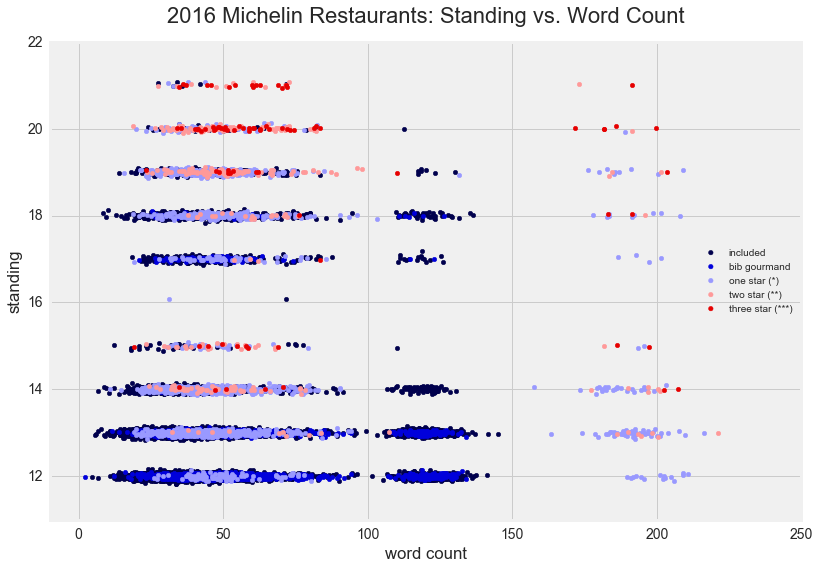

In [198]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

distinction_colors = []
for i in range(0, 256, 256/5):
    distinction_colors.append(cm.seismic(i))

def rand_jitter(arr):
    stdev = .005*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev    
    
df_incl = df[df['included'] == 1]
df_1 = df[(df['stars'] == 1)]
df_2 = df[(df['stars'] == 2)]
df_3 = df[(df['stars'] == 3)]
df_bib = df[(df['bib'] == 1)]

plt.scatter(rand_jitter(df_incl['num_words']), rand_jitter(df_incl['standing']), color = distinction_colors[0], \
            alpha = 1, s = 20, label = 'included')

plt.scatter(rand_jitter(df_bib['num_words']), rand_jitter(df_bib['standing']), color = distinction_colors[1], \
            alpha = 1, s = 20, label = 'bib gourmand')

plt.scatter(rand_jitter(df_1['num_words']), rand_jitter(df_1['standing']), color = distinction_colors[2], \
            alpha = 1, s = 20, label = 'one star (*)')

plt.scatter(rand_jitter(df_2['num_words']), rand_jitter(df_2['standing']), color = distinction_colors[3], \
            alpha = 1, s = 20, label = 'two star (**)')

plt.scatter(rand_jitter(df_3['num_words']), rand_jitter(df_3['standing']), color = distinction_colors[4], \
            alpha = 1, s = 20, label = 'three star (***)')



plt.title('2016 Michelin Restaurants: Standing vs. Word Count', fontsize = 22, y = 1.03)

# y label
plt.ylabel('standing')

# x label
plt.xlabel('word count')

# set the figure boundaries
plt.ylim([11, 22])
plt.xlim([-10, 250])
plt.grid(True)
plt.legend(loc='center right', fontsize = 10)

plt.show()

Three-stars with more words (language TBD), higher standing:

In [199]:
df[(df['standing'] > 16) & (df['stars'] == 3) & (df['num_words'] > 150)]\
[['name', 'currency', 'stars', 'standing']]

,name,currency,stars,standing
11793,Le Bernardin,USD,3,20.0
11798,Per Se,USD,3,21.0
11814,Masa,USD,3,18.0
11844,Jean-Georges,USD,3,20.0
11961,The French Laundry,USD,3,20.0
12025,The Restaurant at Meadowood,USD,3,20.0
12364,Chef's Table at Brooklyn Fare,USD,3,18.0
12432,Saison,USD,3,19.0
13550,Grace,USD,3,20.0


Three-stars with fewer words (language TBD), higher standing:

In [188]:
df[(df['standing'] > 16) & (df['stars'] == 3) & (df['num_words'] < 100)]\
[['name', 'currency', 'stars', 'standing']]

Three-stars with more words (language TBD), lower standing:

In [200]:
df[(df['standing'] < 16) & (df['stars'] == 3) & (df['num_words'] > 150)]\
[['name', 'currency', 'stars', 'standing']]

,name,currency,stars,standing
11762,Eleven Madison Park,USD,3,15.0
11983,Manresa,USD,3,14.0
12237,Alinea,USD,3,15.0
12505,Benu,USD,3,14.0


Three-stars with fewer words (language TBD), lower standing:

In [201]:
df[(df['standing'] < 16) & (df['stars'] == 3) & (df['num_words'] < 150)]\
[['name', 'currency', 'stars', 'standing']]

,name,currency,stars,standing
1121,Arpège,EUR,3,14.0
1146,Pierre Gagnaire,EUR,3,15.0
1187,Astrance,EUR,3,14.0
3105,De Karmeliet,EUR,3,15.0
3776,Gordon Ramsay,GBP,3,15.0
4842,Piazza Duomo,EUR,3,14.0
5543,Osteria Francescana,EUR,3,15.0
5857,Le Calandre,EUR,3,15.0
9870,T'ang Court,HKD,3,15.0
9911,Bo Innovation,HKD,3,14.0


What's with so few restaurants having standing of 16?

In [202]:
df[df['standing'] == 16][['name', 'currency', 'stars']]

,name,currency,stars
1144,Laurent,EUR,1
16333,Lai Heen,MOP,0


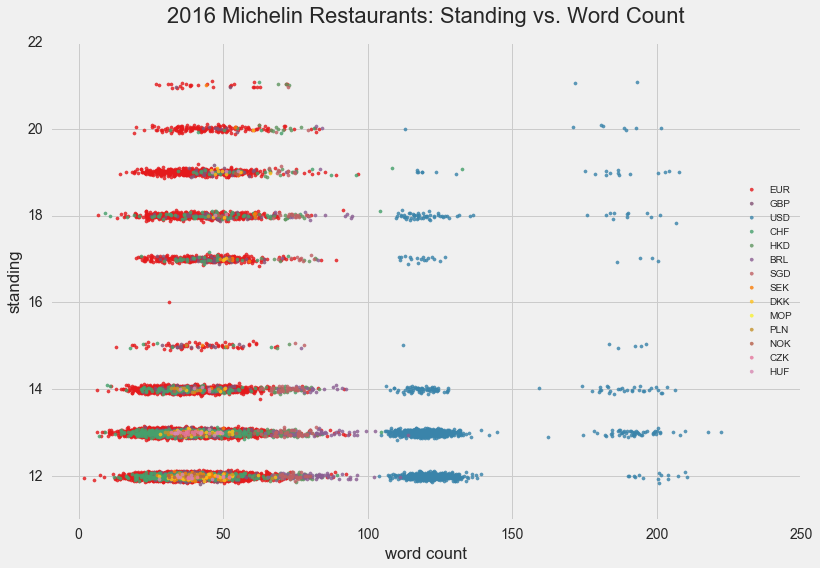

In [203]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

currency_colors = []
for i in range(0, 256, 256/14):
    currency_colors.append(cm.Set1(i))

currency_dict = dict(zip(conversion_rate.keys(), currency_colors))

def rand_jitter(arr):
    stdev = .005*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev    

df_USD = df[df['currency'] == 'USD']
df_CHF = df[df['currency'] == 'CHF']
df_GBP = df[df['currency'] == 'GBP']
df_DKK = df[df['currency'] == 'DKK']
df_EUR = df[df['currency'] == 'EUR']
df_HUF = df[df['currency'] == 'HUF']
df_NOK = df[df['currency'] == 'NOK']
df_MOP = df[df['currency'] == 'MOP']
df_CZK = df[df['currency'] == 'CZK']
df_BRL = df[df['currency'] == 'BRL']
df_PLN = df[df['currency'] == 'PLN']
df_SEK = df[df['currency'] == 'SEK']
df_SGD = df[df['currency'] == 'SGD']
df_HKD = df[df['currency'] == 'HKD']


currency_dfs = [df_EUR, df_GBP, df_USD, df_CHF, df_HKD, df_BRL, df_SGD, df_SEK, df_DKK, \
                df_MOP, df_PLN, df_NOK, df_CZK, df_HUF]    
    
for i in range(len(currency_dfs)):
    
    plt.scatter(rand_jitter(currency_dfs[i]['num_words']), \
                rand_jitter(currency_dfs[i]['standing']), \
                color = currency_colors[i], alpha = 0.8, s = 10, \
                label = df['currency'].value_counts().index[i])

plt.title('2016 Michelin Restaurants: Standing vs. Word Count', fontsize = 22, y = 1.03)

# y label
plt.ylabel('standing')

# x label
plt.xlabel('word count')

# set the figure boundaries
plt.ylim([11, 22])
plt.xlim([-10, 250])
plt.grid(True)
plt.legend(loc='center right', fontsize = 10)

plt.show()

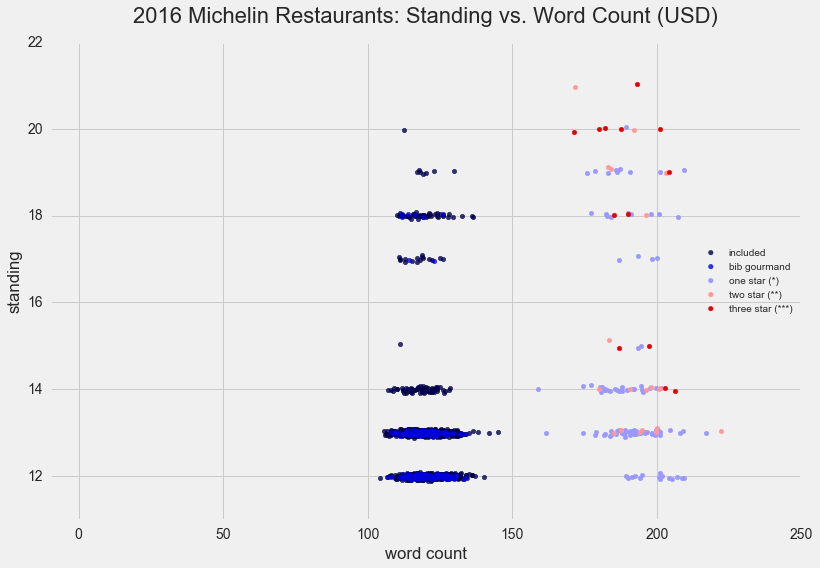

In [204]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

distinction_colors = []
for i in range(0, 256, 256/5):
    distinction_colors.append(cm.seismic(i))

def rand_jitter(arr):
    stdev = .005*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev    
    
df_incl_USD = df[(df['included'] == 1) & (df['currency'] == 'USD')]
df_1_USD = df[(df['stars'] == 1) & (df['currency'] == 'USD')]
df_2_USD = df[(df['stars'] == 2) & (df['currency'] == 'USD')]
df_3_USD = df[(df['stars'] == 3) & (df['currency'] == 'USD')]
df_bib_USD = df[(df['bib'] == 1) & (df['currency'] == 'USD')]

plt.scatter(rand_jitter(df_incl_USD['num_words']), rand_jitter(df_incl_USD['standing']), \
            color = distinction_colors[0], \
            alpha = 0.8, s = 20, label = 'included')

plt.scatter(rand_jitter(df_bib_USD['num_words']), rand_jitter(df_bib_USD['standing']), \
            color = distinction_colors[1], \
            alpha = 0.8, s = 20, label = 'bib gourmand')

plt.scatter(rand_jitter(df_1_USD['num_words']), rand_jitter(df_1_USD['standing']), \
            color = distinction_colors[2], \
            alpha = 1, s = 20, label = 'one star (*)')

plt.scatter(rand_jitter(df_2_USD['num_words']), rand_jitter(df_2_USD['standing']), \
            color = distinction_colors[3], \
            alpha = 1, s = 20, label = 'two star (**)')

plt.scatter(rand_jitter(df_3_USD['num_words']), rand_jitter(df_3_USD['standing']), \
            color = distinction_colors[4], \
            alpha = 1, s = 20, label = 'three star (***)')


plt.title('2016 Michelin Restaurants: Standing vs. Word Count (USD)', fontsize = 22, y = 1.03)

# y label
plt.ylabel('standing')

# x label
plt.xlabel('word count')

# set the figure boundaries
plt.ylim([11, 22])
plt.xlim([-10, 250])
plt.grid(True)
plt.legend(loc='center right', fontsize = 10)

plt.show()

Three-stars in the U.S. (NB all male chefs):

In [205]:
df_3_USD[['name', 'cuisine', 'blurb']]

,name,cuisine,blurb
11762,Eleven Madison Park,Contemporary,"Chef Daniel Humm's cooking is clever, innovati..."
11793,Le Bernardin,Seafood,Eric Ripert's paean to all things piscatorial ...
11798,Per Se,Contemporary,There is no more dramatic departure from the s...
11814,Masa,Japanese,To taste what may be the continent's best sush...
11844,Jean-Georges,Contemporary,The crown-jewel restaurant of a crown-jewel Tr...
11961,The French Laundry,Contemporary,After more than 20 years of gracing every food...
11983,Manresa,Contemporary,"Recovered, renewed, and fresh off its hiatus, ..."
12025,The Restaurant at Meadowood,Contemporary,Located in a sprawling verdant resort amid mou...
12237,Alinea,Contemporary,Who needs a meal followed by a show when you c...
12364,Chef's Table at Brooklyn Fare,Contemporary,At 7:00 P.M. this storefront attached to a gou...


Try to understand why there is such a big split at standing of 16:

In [179]:
df_USD[(df_USD['standing'] > 16) & (df_USD['num_words'] > 150)][['name', 'cuisine', 'stars', \
                                        'bib', 'standing']].sort('stars', ascending = False)

In [178]:
df_USD[(df_USD['standing'] < 16) & (df_USD['num_words'] > 150)][['name', 'cuisine', 'blurb']]

In [206]:
df['avg_USD'].describe()

count    18659.000000
mean        49.840991
std         27.066963
min          1.950000
25%         35.160000
50%         42.250000
75%         56.960000
max        455.000000
Name: avg_USD, dtype: float64

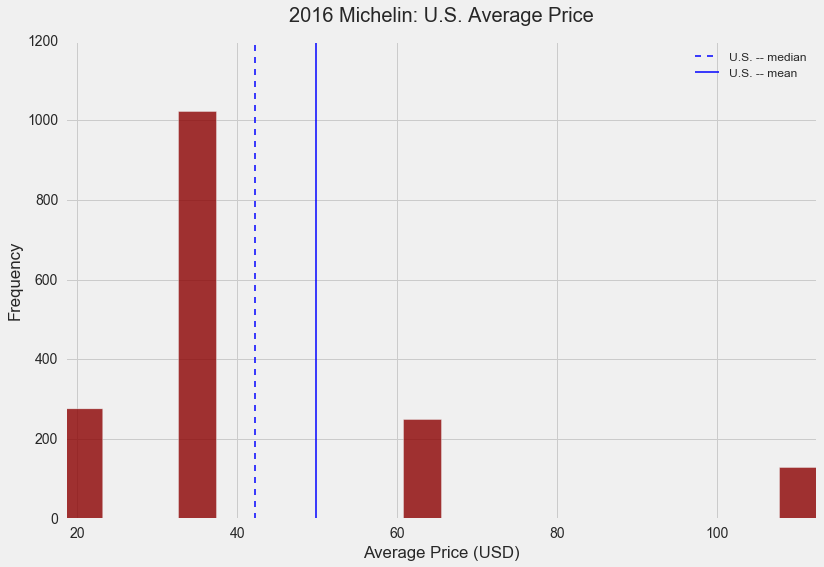

In [207]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

plt.hist(df_USD['avg_USD'], color = 'darkred', alpha = 0.8, bins = 20)
plt.axvline(df['avg_USD'].median(), color='b', linestyle='dashed', linewidth=1.5, label = 'U.S. -- median')
plt.axvline(df['avg_USD'].mean(), color='b', linestyle='solid', linewidth=1.5, label = 'U.S. -- mean')

plt.title('2016 Michelin: U.S. Average Price', fontsize = 20, y = 1.03)

# y label
plt.ylabel('Frequency')

# x label
plt.xlabel('Average Price (USD)')

plt.xlim([min(df_USD['avg_USD']), max(df_USD['avg_USD'])])
#plt.ylim([0, 110])

plt.legend(loc='upper right', fontsize = 12)

plt.show()

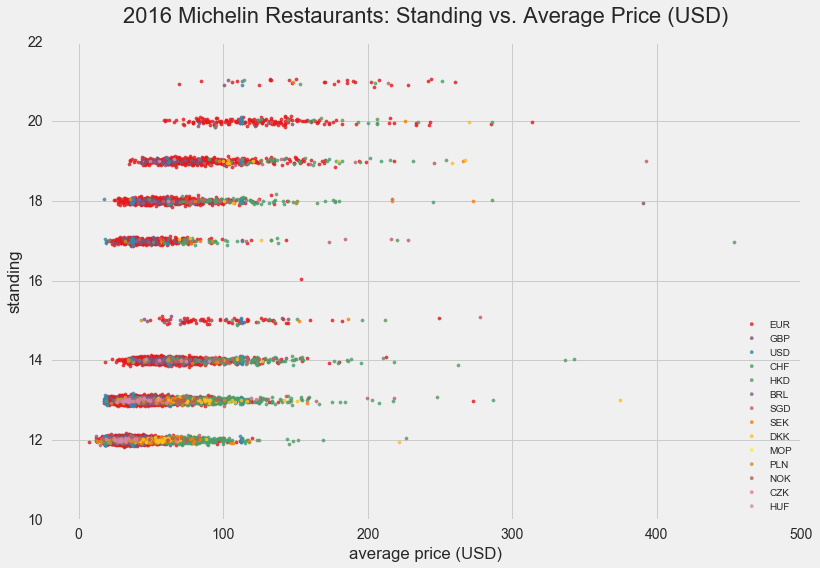

In [208]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

currency_colors = []
for i in range(0, 256, 256/14):
    currency_colors.append(cm.Set1(i))

currency_dict = dict(zip(conversion_rate.keys(), currency_colors))

def rand_jitter(arr):
    stdev = .005*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev    

 
for i in range(len(currency_dfs)):
    
    plt.scatter(rand_jitter(currency_dfs[i]['avg_USD']), \
                rand_jitter(currency_dfs[i]['standing']), \
                color = currency_colors[i], alpha = 0.8, s = 10, \
                label = df['currency'].value_counts().index[i])
    
plt.title('2016 Michelin Restaurants: Standing vs. Average Price (USD)', fontsize = 22, y = 1.03)

# y label
plt.ylabel('standing')

# x label
plt.xlabel('average price (USD)')

# set the figure boundaries
plt.ylim([10, 22])
plt.xlim([-20, 500])
plt.grid(True)
plt.legend(loc='lower right', fontsize = 10)

plt.show()

In [209]:
df[df['avg_USD'] > 300][['name', 'cuisine', 'blurb', 'currency', 'stars']]

,name,cuisine,blurb,currency,stars
2657,Pierre Gagnaire pour les Airelles,Creative,Expect an avalanche of flavours amid the sumpt...,EUR,2
7890,Alchemist,innovative,The ambitious chef transports diners to anothe...,DKK,0
9849,Sun Tung Lok (Central),Cantonese,The original Sun Tung Lok opened in 1969 in Ca...,HKD,0
10008,Sushi Shikon,Sushi,The name may have changed from Sushi Yoshitake...,HKD,3
14811,Araki,Japanese,Mitsuhiro Araki is one of Japan's great Sushi ...,GBP,2
15977,Denis Martin,Creative,Enjoy the sometimes surprising avant-garde cui...,CHF,1
17979,Waku Ghin,Japanese,Gather up all your winnings at the casino - fo...,SGD,1


In [ ]:
## try this but with coloring for stars!!!!

# plt.figure(figsize=(12,8))
# plt.style.use('fivethirtyeight')

# currency_colors = []
# for i in range(0, 256, 256/14):
#     currency_colors.append(cm.Set1(i))

# currency_dict = dict(zip(conversion_rate.keys(), currency_colors))

# def rand_jitter(arr):
#     stdev = .005*(max(arr)-min(arr))
#     return arr + np.random.randn(len(arr)) * stdev    

 
# for i in range(len(currency_dfs)):
    
#     plt.scatter(rand_jitter(currency_dfs[i]['avg_USD']), \
#                 rand_jitter(currency_dfs[i]['standing']), \
#                 color = currency_colors[i], alpha = 0.8, s = 10, \
#                 label = df['currency'].value_counts().index[i])
    
# plt.title('2016 Michelin Restaurants: Standing vs. Average Price (USD)', fontsize = 22, y = 1.03)

# # y label
# plt.ylabel('standing')

# # x label
# plt.xlabel('average price (USD)')

# # set the figure boundaries
# plt.ylim([10, 22])
# plt.xlim([-20, 500])
# plt.grid(True)
# plt.legend(loc='lower right', fontsize = 10)

# plt.show()

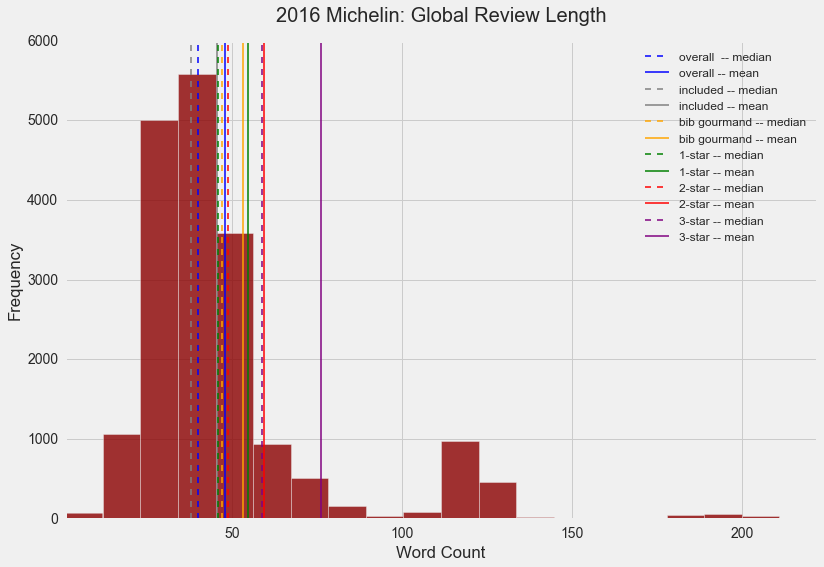

In [210]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

plt.hist(df['num_words'], color = 'darkred', alpha = 0.8, bins = 20)
plt.axvline(df['num_words'].median(), color='b', linestyle='dashed', linewidth=1.5, label = 'overall  -- median')
plt.axvline(df['num_words'].mean(), color='b', linestyle='solid', linewidth=1.5, label = 'overall -- mean')
plt.axvline(df_incl['num_words'].median(), color='grey', linestyle='dashed', linewidth=1.5, label = 'included -- median')
plt.axvline(df_incl['num_words'].mean(), color='grey', linestyle='solid', linewidth=1.5, label = 'included -- mean')
plt.axvline(df_bib['num_words'].median(), color='orange', linestyle='dashed', linewidth=1.5, label = 'bib gourmand -- median')
plt.axvline(df_bib['num_words'].mean(), color='orange', linestyle='solid', linewidth=1.5, label = 'bib gourmand -- mean')
plt.axvline(df_1['num_words'].median(), color='g', linestyle='dashed', linewidth=1.5, label = '1-star -- median')
plt.axvline(df_1['num_words'].mean(), color='g', linestyle='solid', linewidth=1.5, label = '1-star -- mean')
plt.axvline(df_2['num_words'].median(), color='r', linestyle='dashed', linewidth=1.5, label = '2-star -- median')
plt.axvline(df_2['num_words'].mean(), color='r', linestyle='solid', linewidth=1.5, label = '2-star -- mean')
plt.axvline(df_3['num_words'].median(), color='purple', linestyle='dashed', linewidth=1.5, label = '3-star -- median')
plt.axvline(df_3['num_words'].mean(), color='purple', linestyle='solid', linewidth=1.5, label = '3-star -- mean')

plt.title('2016 Michelin: Global Review Length', fontsize = 20, y = 1.03)

# y label
plt.ylabel('Frequency')

# x label
plt.xlabel('Word Count')

plt.xlim([min(df['num_words']), max(df['num_words'])])
#plt.ylim([0, 110])

plt.legend(loc='upper right', fontsize = 12)

plt.show()

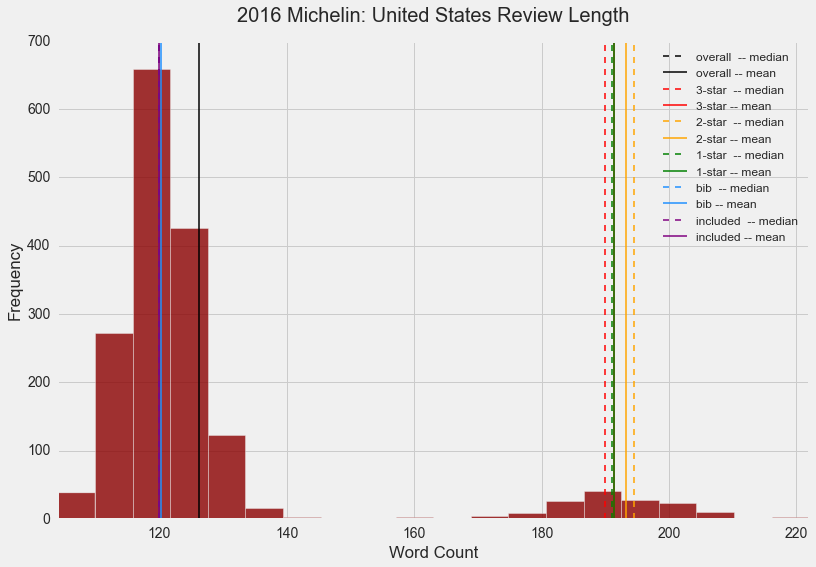

In [211]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

plt.hist(df_USD['num_words'], color = 'darkred', alpha = 0.8, bins = 20)
plt.axvline(df_USD['num_words'].median(), color='black', linestyle='dashed', linewidth=1.5, label = 'overall  -- median')
plt.axvline(df_USD['num_words'].mean(), color='black', linestyle='solid', linewidth=1.5, label = 'overall -- mean')
plt.axvline(df_3_USD['num_words'].median(), color='r', linestyle='dashed', linewidth=1.5, label = '3-star  -- median')
plt.axvline(df_3_USD['num_words'].mean(), color='r', linestyle='solid', linewidth=1.5, label = '3-star -- mean')
plt.axvline(df_2_USD['num_words'].median(), color='orange', linestyle='dashed', linewidth=1.5, label = '2-star  -- median')
plt.axvline(df_2_USD['num_words'].mean(), color='orange', linestyle='solid', linewidth=1.5, label = '2-star -- mean')
plt.axvline(df_1_USD['num_words'].median(), color='green', linestyle='dashed', linewidth=1.5, label = '1-star  -- median')
plt.axvline(df_1_USD['num_words'].mean(), color='green', linestyle='solid', linewidth=1.5, label = '1-star -- mean')
plt.axvline(df_bib_USD['num_words'].median(), color='dodgerblue', linestyle='dashed', linewidth=1.5, label = 'bib  -- median')
plt.axvline(df_bib_USD['num_words'].mean(), color='dodgerblue', linestyle='solid', linewidth=1.5, label = 'bib -- mean')
plt.axvline(df_incl_USD['num_words'].median(), color='purple', linestyle='dashed', linewidth=1.5, label = 'included  -- median')
plt.axvline(df_incl_USD['num_words'].mean(), color='purple', linestyle='solid', linewidth=1.5, label = 'included -- mean')


plt.title('2016 Michelin: United States Review Length', fontsize = 20, y = 1.03)

# y label
plt.ylabel('Frequency')

# x label
plt.xlabel('Word Count')

plt.xlim([min(df_USD['num_words']), max(df_USD['num_words'])])
#plt.ylim([0, 110])

plt.legend(loc='upper right', fontsize = 12)

plt.show()

In [212]:
n = 14

info_len = []

print 'index of observation with add_info length %s:\n' %n
for i in range(len(df)):
    length = len(df['add_info'][i])
    if length == n:
        print i
    elif length in distinction_set:
        continue
    else:
         info_len.append(length)
            
print '\nin addition to length %s, ' %n + 'there are add_info of lengths: %s' %list(set(info_len))

index of observation with add_info length 14:

390
613
867
1298
1525
2604
2638
4152
4222
5822
6992

in addition to length 14, there are add_info of lengths: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15]


Inspect a bunch of these and make a function to dummify amenities:

In [213]:
df['add_info'][6992]

['Menu 85/130 \xe2\x82\xac - Carte 69/112 \xe2\x82\xac',
 'dinner only',
 'A particularly interesting wine list',
 'Interesting or extensive view',
 'Park or Garden',
 'Meals outside',
 'Tennis',
 'Air conditioning',
 'No dogs allowed',
 'Private dining rooms',
 'Address via Santa Chiara 26, 84010 RAVELLO',
 'Phone +39089857459',
 'Email ristorante@villacimbrone.com',
 'Website: http://www.villacimbrone.com']

In [214]:
def cleaner_restaurant(df):
    
    wine = []
    view = []
    garden = []
    dinner_tasting = []
    dinner_only = []
    lunch_only = []
    outside_dining = []
    air_conditioning = []
    no_dogs = []
    parking = []
    wheelchair = []
    private_dining = []
    with_rooms = []
    booking = []
    tennis = []
    valet = []

    for i in range(len(df)):
        name = df['name'][i]
        info_listlet = df['add_info'][i]
    
        ## WINE
        if 'A particularly interesting wine list' in info_listlet:
            wine.append(1)
        else:
            wine.append(0)
    
        ## VIEW
        if 'Interesting or extensive view' in info_listlet:
            view.append(1)
        else:
            view.append(0)

        ## PARK OR GARDEN
        if 'Park or Garden' in info_listlet:
            garden.append(1)
        else:
            garden.append(0)

        ## DINNER TASTING MENU ONLY
        if 'dinner only - set menu only' in info_listlet:
            dinner_tasting.append(1)
        else:
            dinner_tasting.append(0)

        ## MEALS OUTSIDE
        if 'Meals outside' in info_listlet:
            outside_dining.append(1)
        else:
            outside_dining.append(0)      

        ## AIR CONDITIONING
        if 'Air conditioning' in info_listlet:
            air_conditioning.append(1)
        else:
            air_conditioning.append(0) 

        ## NO DOGS
        if 'No dogs allowed' in info_listlet:
            no_dogs.append(1)
        else:
            no_dogs.append(0)

        ## DINNER ONLY
        if 'dinner only - booking advisable' in info_listlet: 
            dinner_only.append(1)
        elif 'dinner only - set menu only' in info_listlet:
            dinner_only.append(1)
        else:
            if 'dinner only' in info_listlet:
                dinner_only.append(1)
            else:
                dinner_only.append(0)

        ## WHEELCHAIR ACCESSIBLE
        if 'Wheelchair accessible' in info_listlet:
            wheelchair.append(1)
        else:
            wheelchair.append(0)

        ## PARKING
        if 'Enclosed car park' in info_listlet:
            parking.append(1)
        elif 'Garage' in info_listlet:
            parking.append(1)
        elif 'Valet parking' in info_listlet:
            parking.append(1)
        else:
            parking.append(0)    

        ## PRIVATE DINING 
        if 'Private dining rooms' in info_listlet:
            private_dining.append(1)
        else:
            private_dining.append(0) 

        ## WITH ROOMS
        if 'With rooms' in info_listlet:
            with_rooms.append(1)
        elif 'avec chambre(s)' in info_listlet:
            with_rooms.append(1)
        else:
            with_rooms.append(0)

        ## BOOKING ADVISABLE
        if 'booking advisable' in info_listlet:
            booking.append(1)
        elif 'dinner only - booking advisable' in info_listlet:
            booking.append(1)
        else:
            booking.append(0)

        ## LUNCH ONLY
        if 'lunch only' in info_listlet:
            lunch_only.append(1)
        elif 'd\xc3\xa9jeuner seulement' in info_listlet:
            lunch_only.append(1)
        else:
            lunch_only.append(0)
            
        ## TENNIS
        if 'Tennis' in info_listlet:
            tennis.append(1)
        else:
            tennis.append(0)
            
        ## VALET
        if 'Valet parking' in info_listlet:
            valet.append(1)
        else:
            valet.append(0)
  
        ## MAKE SURE NO MISMATCHES IN LIST LENGTH    
        length_list = [len(wine), len(view), len(garden), len(dinner_tasting), \
                len(dinner_only), len(lunch_only), len(outside_dining), len(air_conditioning), \
                len(no_dogs), len(parking), len(wheelchair), len(private_dining), \
                len(with_rooms), len(booking), len(tennis), len(valet)]

        if len(set(length_list)) > 1:

            print '\n'
            print set(length_list)
            print 'Things got screwy near %s!\n' %name
            print 'wine: %s' %len(wine)
            print 'view: %s' %len(view)
            print 'garden: %s' %len(garden)
            print 'dinner_tasting: %s' %len(dinner_tasting)
            print 'dinner_only: %s' %len(dinner_only)
            print 'lunch_only: %s' %len(lunch_only)  
            print 'outside_dining: %s' %len(outside_dining)
            print 'air_conditioning: %s' %len(air_conditioning)
            print 'no_dogs: %s' %len(no_dogs)
            print 'parking: %s' %len(parking)
            print 'wheelchair: %s' %len(wheelchair)
            print 'private dining: %s' %len(private_dining)
            print 'with rooms: %s' %len(with_rooms)
            print 'booking: %s' %len(booking)
            print 'tennis: %s' %len(tennis)
            print 'valet: %s' %len(valet)
            break    
            os.system('say "Uh oh, column mismatch."')

        else:
            continue

    

    df['wine'] = wine
    df['view'] = view
    df['garden'] = garden
    df['outside_dining'] = outside_dining
    df['air_conditioning'] = air_conditioning
    df['no_dogs'] = no_dogs
    df['parking'] = parking
    df['dinner_only'] = dinner_only
    df['wheelchair'] = wheelchair
    df['private_dining'] = private_dining
    df['with_rooms'] = with_rooms
    df['booking'] = booking
    df['lunch_only'] = lunch_only
    df['tennis'] = tennis
    df['dinner_tasting'] = dinner_tasting
    df['valet'] = valet
    
    return df

In [217]:
df = cleaner_restaurant(df)
cPickle.dump(df, open('assets/big_df_postcleaner.p', 'wb')) 

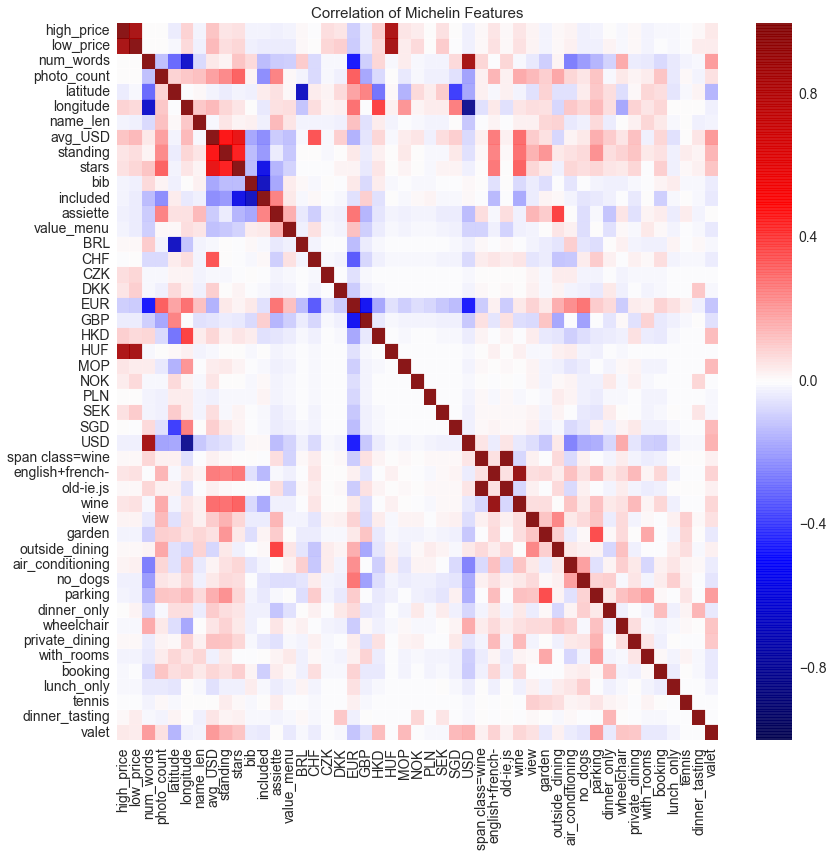

In [218]:
plt.figure(figsize=(12,12))
sns.set(font_scale=1.4)
ax = sns.heatmap(df.corr(), cmap = "seismic", alpha = 0.9)

ax.axes.set_title("Correlation of Michelin Features", size = 15)

plt.show()

In [219]:
count = 0
for i in range(len(df)):
    x = set([df['span class=wine'][i], df['english+french-'][i], df['old-ie.js'][i], df['wine'][i]])
    if len(x) > 1:
        count += 1
len(df) - count

2908

In [220]:
df.columns

Index([u'name', u'cuisine', u'blurb', u'currency', u'photos', u'add_info',
       u'high_price', u'low_price', u'num_words', u'photo_count', u'latitude',
       u'longitude', u'name_len', u'avg_USD', u'standing', u'stars', u'bib',
       u'included', u'assiette', u'value_menu', u'BRL', u'CHF', u'CZK', u'DKK',
       u'EUR', u'GBP', u'HKD', u'HUF', u'MOP', u'NOK', u'PLN', u'SEK', u'SGD',
       u'USD', u'span class=wine', u'english+french-', u'old-ie.js', u'wine',
       u'view', u'garden', u'outside_dining', u'air_conditioning', u'no_dogs',
       u'parking', u'dinner_only', u'wheelchair', u'private_dining',
       u'with_rooms', u'booking', u'lunch_only', u'tennis', u'dinner_tasting',
       u'valet'],
      dtype='object')

In [224]:
df = df[[u'name', u'cuisine', u'blurb', u'currency', u'photos', u'add_info',
       u'num_words', u'photo_count', u'latitude',
       u'longitude', u'name_len', u'avg_USD', u'standing', u'stars', u'bib',
       u'included', u'assiette', u'value_menu', u'BRL', u'CHF', u'CZK', u'DKK',
       u'EUR', u'GBP', u'HKD', u'HUF', u'MOP', u'NOK', u'PLN', u'SEK', u'SGD',
       u'USD', u'span class=wine', u'english+french-', u'old-ie.js', u'wine',
       u'view', u'garden', u'outside_dining', u'air_conditioning', u'no_dogs',
       u'parking', u'dinner_only', u'wheelchair', u'private_dining',
       u'with_rooms', u'booking', u'lunch_only', u'tennis', u'dinner_tasting',
       u'valet']]

df.columns[14]

'bib'

Proportion of restaurants with given feature:

In [225]:
df.ix[:,14:len(df.columns)].sum()/len(df)

bib                 0.143523
included            0.734820
assiette            0.162120
value_menu          0.073316
BRL                 0.008414
CHF                 0.050110
CZK                 0.001661
DKK                 0.004877
EUR                 0.696983
GBP                 0.109706
HKD                 0.014149
HUF                 0.001554
MOP                 0.004287
NOK                 0.002144
PLN                 0.002787
SEK                 0.005574
SGD                 0.007664
USD                 0.090091
span class=wine     0.975401
english+french-     0.128463
old-ie.js           0.975401
wine                0.147221
view                0.043196
garden              0.111689
outside_dining      0.221448
air_conditioning    0.403023
no_dogs             0.242296
parking             0.369795
dinner_only         0.069243
wheelchair          0.250817
private_dining      0.300606
with_rooms          0.088000
booking             0.098826
lunch_only          0.011630
tennis        

In [226]:
df['cuisine'].value_counts()

 Modern                                  3270
 Traditional                             2448
 Regional                                1479
 Classic                                  836
 Fish and seafood                         821
 Creative                                 803
 International                            779
 Italian                                  695
 French classic                           330
 British traditional                      322
 Mediterranean                            317
 Japanese                                 298
 British modern                           294
  moderne                                 281
 French                                   242
 American                                 185
  traditionnelle                          178
 Chinese                                  167
 Contemporary                             160
 French modern                            157
 Indian                                   141
 modern                           

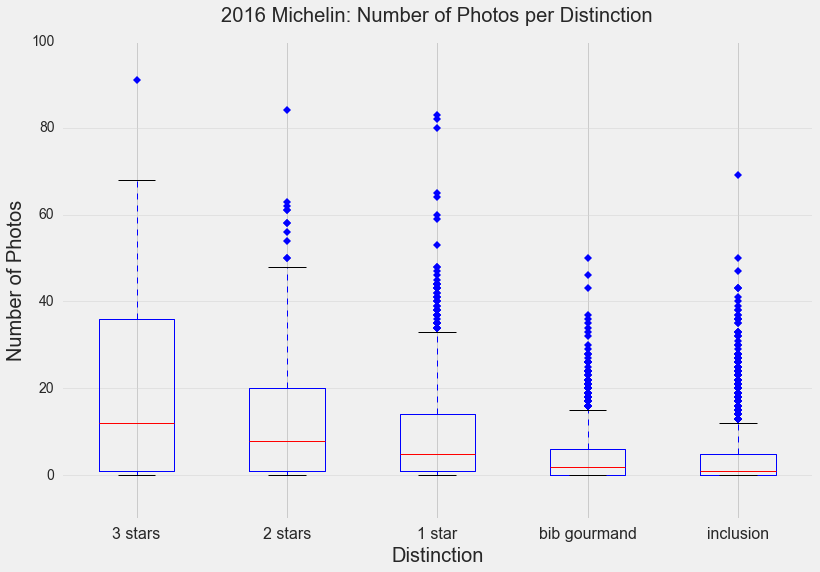

In [228]:
data = [df[df['stars'] == 3]['photo_count'], 
        df[df['stars'] == 2]['photo_count'], 
        df[df['stars'] == 1]['photo_count'],
        df[df['bib'] == 1]['photo_count'],
        df[df['included'] == 1]['photo_count']]

plt.style.use('fivethirtyeight')
fig, ax1 = plt.subplots(figsize=(12, 8))
fig.canvas.set_window_title('')
plt.subplots_adjust()

bp = plt.boxplot(data, 0, 'gD')

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set_axisbelow(True)
ax1.set_title('2016 Michelin: Number of Photos per Distinction', y =1.03)
ax1.set_xlabel('Distinction', fontsize = 20)
ax1.set_ylabel('Number of Photos', fontsize = 20)

# Set the axes ranges and axes labels
numBoxes = 5
#ax1.set_xlim(0.5, numBoxes + 0.5)
ax1.set_ylim(-10, 100)
xtickNames = plt.setp(ax1, xticklabels=['3 stars', '2 stars', '1 star', 'bib gourmand', \
                                        'inclusion'])
plt.setp(xtickNames, fontsize=16)

plt.show()

In [230]:
df[(df['stars'] == 2) & (df['photo_count'] > 80)][['name', 'cuisine', 'blurb', 'currency', 'stars']]

,name,cuisine,blurb,currency,stars
18146,Serge Vieira,Creative,"From his contemporary vessel (stone, iron and ...",EUR,2


In [231]:
df[(df['stars'] == 3) & (df['photo_count'] > 80)][['name', 'cuisine', 'blurb', 'currency', 'stars']]

,name,cuisine,blurb,currency,stars
876,Paul Bocuse,Classic,A high temple of tradition and old-style servi...,EUR,3
927,Flocons de Sel,Creative,A group of chalets overlooking Megève... It is...,EUR,3


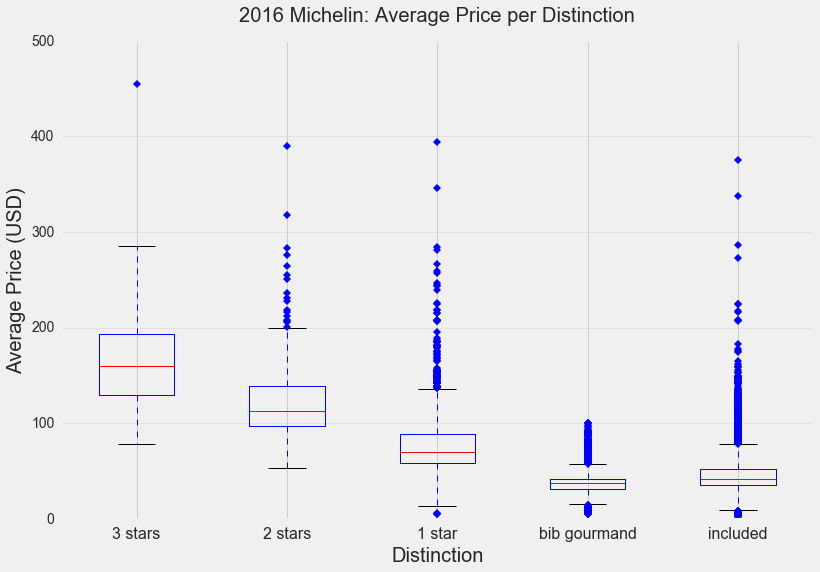

In [232]:
data = [df[df['stars'] == 3]['avg_USD'], 
        df[df['stars'] == 2]['avg_USD'], 
        df[df['stars'] == 1]['avg_USD'],
        df[df['bib'] == 1]['avg_USD'],
        df[df['included'] == 1]['avg_USD']]

plt.style.use('fivethirtyeight')
fig, ax1 = plt.subplots(figsize=(12, 8))
fig.canvas.set_window_title('')
plt.subplots_adjust(\
#                    left=0.075, right=0.95, top=0.9, bottom=0.25\
                   )

bp = plt.boxplot(data, 0, 'gD')

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set_axisbelow(True)
ax1.set_title('2016 Michelin: Average Price per Distinction', y =1.03)
ax1.set_xlabel('Distinction', fontsize = 20)
ax1.set_ylabel('Average Price (USD)', fontsize = 20)

# Set the axes ranges and axes labels
numBoxes = 5
#ax1.set_xlim(0.5, numBoxes + 0.5)
#ax1.set_ylim(-10, 450)
xtickNames = plt.setp(ax1, xticklabels=['3 stars', '2 stars', '1 star', 'bib gourmand', \
                                        'included'])
plt.setp(xtickNames, fontsize=16)

plt.show()

Over 300 USD for a 1-star meal:

In [235]:
df[(df['stars'] == 1) & (df['avg_USD'] > 300)][['name', 'cuisine', 'currency', 'avg_USD', 'stars']]

,name,cuisine,currency,avg_USD,stars
15977,Denis Martin,Creative,CHF,346.32,1
17979,Waku Ghin,Japanese,SGD,393.75,1


In [236]:
df[(df['stars'] == 0) & (df['avg_USD'] > 250)][['name', 'cuisine', 'currency', 'avg_USD', 'stars']]

,name,cuisine,currency,avg_USD,stars
7890,Alchemist,innovative,DKK,375.00,0
9849,Sun Tung Lok (Central),Cantonese,HKD,338.00,0
15927,La Coupole/Matsuhisa,Asian,CHF,286.00,0
17114,Oblò,Poissons et fruits de mer,EUR,272.79,0


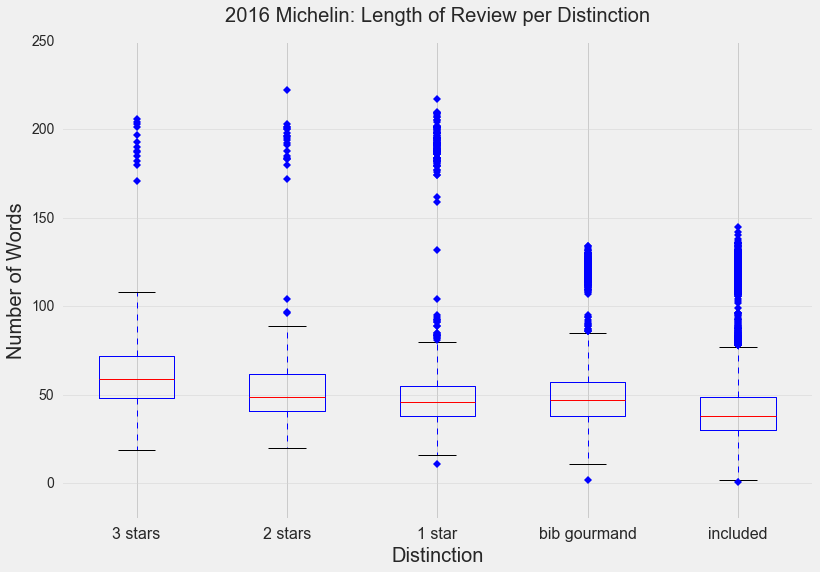

In [237]:
data = [df[df['stars'] == 3]['num_words'], 
        df[df['stars'] == 2]['num_words'], 
        df[df['stars'] == 1]['num_words'],
        df[df['bib'] == 1]['num_words'],
        df[df['included'] == 1]['num_words']]

plt.style.use('fivethirtyeight')
fig, ax1 = plt.subplots(figsize=(12, 8))
fig.canvas.set_window_title('')
plt.subplots_adjust(\
#                    left=0.075, right=0.95, top=0.9, bottom=0.25\
                   )

bp = plt.boxplot(data, 0, 'gD')

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set_axisbelow(True)
ax1.set_title('2016 Michelin: Length of Review per Distinction', y =1.03)
ax1.set_xlabel('Distinction', fontsize = 20)
ax1.set_ylabel('Number of Words', fontsize = 20)

# Set the axes ranges and axes labels
numBoxes = 5
#ax1.set_xlim(0.5, numBoxes + 0.5)
ax1.set_ylim(-20, 250)
xtickNames = plt.setp(ax1, xticklabels=['3 stars', '2 stars', '1 star', 'bib gourmand', \
                                        'included'])
plt.setp(xtickNames, fontsize=16)

plt.show()

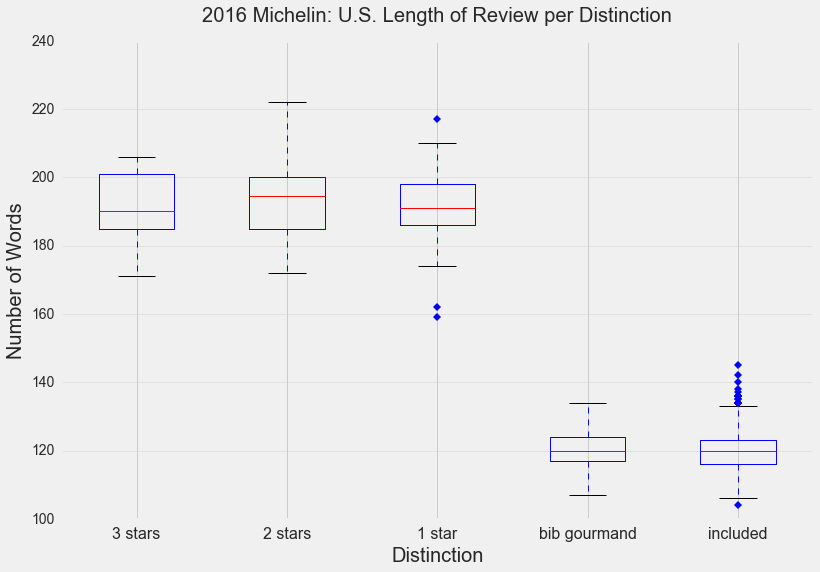

In [239]:
data = [df_3_USD['num_words'], 
        df_2_USD['num_words'], 
        df_1_USD['num_words'],
        df_bib_USD['num_words'],
        df_incl_USD['num_words']]

plt.style.use('fivethirtyeight')
fig, ax1 = plt.subplots(figsize=(12, 8))
fig.canvas.set_window_title('')
plt.subplots_adjust(\
#                    left=0.075, right=0.95, top=0.9, bottom=0.25\
                   )

bp = plt.boxplot(data, 0, 'gD')

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set_axisbelow(True)
ax1.set_title('2016 Michelin: U.S. Length of Review per Distinction', y =1.03)
ax1.set_xlabel('Distinction', fontsize = 20)
ax1.set_ylabel('Number of Words', fontsize = 20)

# Set the axes ranges and axes labels
numBoxes = 5
#ax1.set_xlim(0.5, numBoxes + 0.5)
#ax1.set_ylim(-20, 250)
xtickNames = plt.setp(ax1, xticklabels=['3 stars', '2 stars', '1 star', 'bib gourmand', \
                                        'included'])
plt.setp(xtickNames, fontsize=16)

plt.show()

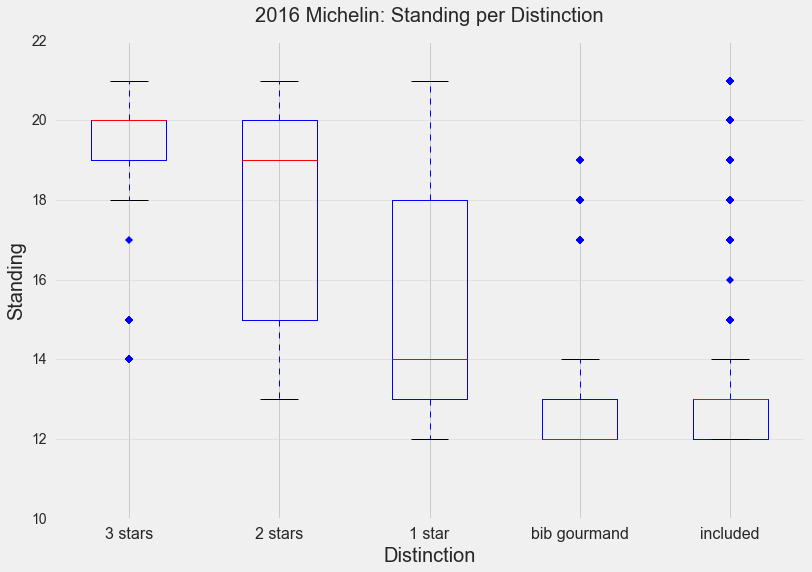

In [240]:
standing_data = df[pd.notnull(df['standing'])]
standing_data = [standing_data[standing_data['stars'] == 3]['standing'], 
        standing_data[standing_data['stars'] == 2]['standing'], 
        standing_data[standing_data['stars'] == 1]['standing'],
        standing_data[standing_data['bib'] == 1]['standing'],
        standing_data[standing_data['included'] == 1]['standing']]

plt.style.use('fivethirtyeight')
fig, ax1 = plt.subplots(figsize=(12, 8))
fig.canvas.set_window_title('')
plt.subplots_adjust(\
#                    left=0.075, right=0.95, top=0.9, bottom=0.25\
                   )

bp = plt.boxplot(standing_data, 0, 'gD')

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set_axisbelow(True)
ax1.set_title('2016 Michelin: Standing per Distinction', y =1.03)
ax1.set_xlabel('Distinction', fontsize = 20)
ax1.set_ylabel('Standing', fontsize = 20)

# Set the axes ranges and axes labels
numBoxes = 5
#ax1.set_xlim(0.5, numBoxes + 0.5)
ax1.set_ylim(10, 22)
xtickNames = plt.setp(ax1, xticklabels=['3 stars', '2 stars', '1 star', 'bib gourmand', \
                                        'included'])
plt.setp(xtickNames, fontsize=16)

plt.show()

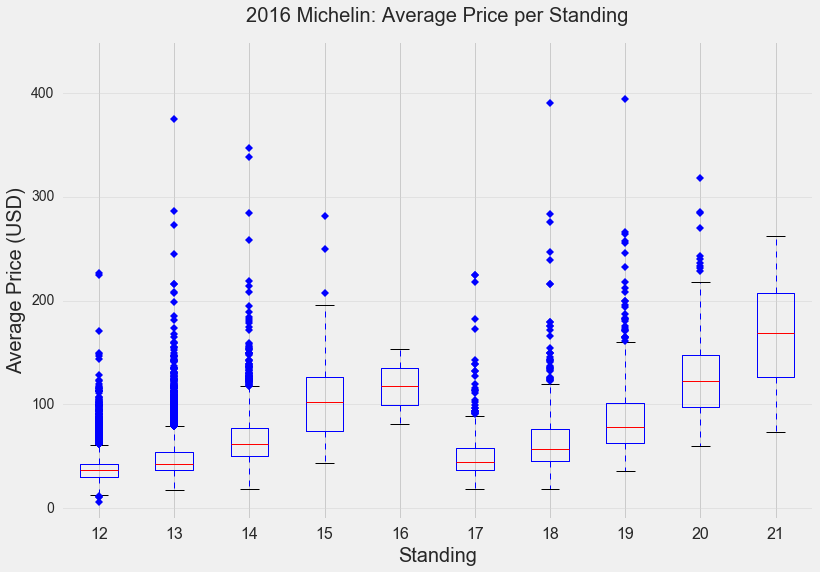

In [242]:
data = [df[df['standing'] == 12]['avg_USD'], 
        df[df['standing'] == 13]['avg_USD'], 
        df[df['standing'] == 14]['avg_USD'],
        df[df['standing'] == 15]['avg_USD'],
        df[df['standing'] == 16]['avg_USD'],
        df[df['standing'] == 17]['avg_USD'],
        df[df['standing'] == 18]['avg_USD'],
        df[df['standing'] == 19]['avg_USD'],
        df[df['standing'] == 20]['avg_USD'],
        df[df['standing'] == 21]['avg_USD']]

plt.style.use('fivethirtyeight')
fig, ax1 = plt.subplots(figsize=(12, 8))
fig.canvas.set_window_title('')
plt.subplots_adjust(\
#                    left=0.075, right=0.95, top=0.9, bottom=0.25\
                   )

bp = plt.boxplot(data, 0, 'gD')

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set_axisbelow(True)
ax1.set_title('2016 Michelin: Average Price per Standing', y =1.03)
ax1.set_xlabel('Standing', fontsize = 20)
ax1.set_ylabel('Average Price (USD)', fontsize = 20)

# Set the axes ranges and axes labels
numBoxes = 5
#ax1.set_xlim(0.5, numBoxes + 0.5)
ax1.set_ylim(-10, 450)
xtickNames = plt.setp(ax1, xticklabels=['12', '13', '14', '15', '16', '17', '18', '19', '20', '21'])
     
plt.setp(xtickNames, fontsize=16)

plt.show()

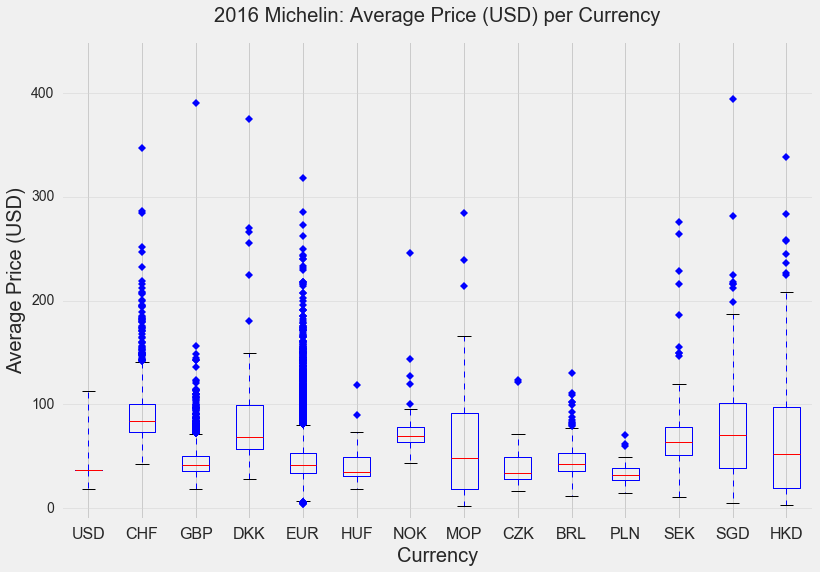

In [243]:
data = [df_USD['avg_USD'], 
        df_CHF['avg_USD'], 
        df_GBP['avg_USD'],
        df_DKK['avg_USD'],
        df_EUR['avg_USD'],
        df_HUF['avg_USD'],
        df_NOK['avg_USD'],
        df_MOP['avg_USD'],
        df_CZK['avg_USD'],
        df_BRL['avg_USD'],
        df_PLN['avg_USD'],
        df_SEK['avg_USD'],
        df_SGD['avg_USD'],
        df_HKD['avg_USD']]

plt.style.use('fivethirtyeight')
fig, ax1 = plt.subplots(figsize=(12, 8))
fig.canvas.set_window_title('')
plt.subplots_adjust(\
#                    left=0.075, right=0.95, top=0.9, bottom=0.25\
                   )

bp = plt.boxplot(data, 0, 'gD')

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set_axisbelow(True)
ax1.set_title('2016 Michelin: Average Price (USD) per Currency', y =1.03)
ax1.set_xlabel('Currency', fontsize = 20)
ax1.set_ylabel('Average Price (USD)', fontsize = 20)

# Set the axes ranges and axes labels
numBoxes = len(conversion_rate.keys())
#ax1.set_xlim(0.5, numBoxes + 0.5)
ax1.set_ylim(-10, 450)
xtickNames = plt.setp(ax1, xticklabels=conversion_rate.keys())
     
plt.setp(xtickNames, fontsize=16)

plt.show()

In [244]:
df_GBP[df_GBP['avg_USD'] > 200]

,name,cuisine,blurb,currency,photos,add_info,high_price,low_price,num_words,photo_count,...,HUF,MOP,NOK,PLN,SEK,SGD,USD,span class=wine,english+french-,old-ie.js
14811,Araki,Japanese,Mitsuhiro Araki is one of Japan's great Sushi ...,GBP,[https://download.viamichelin.com/media/image2...,"[Menu £ 300, dinner only - booking essential -...",300.0,300.0,67,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1


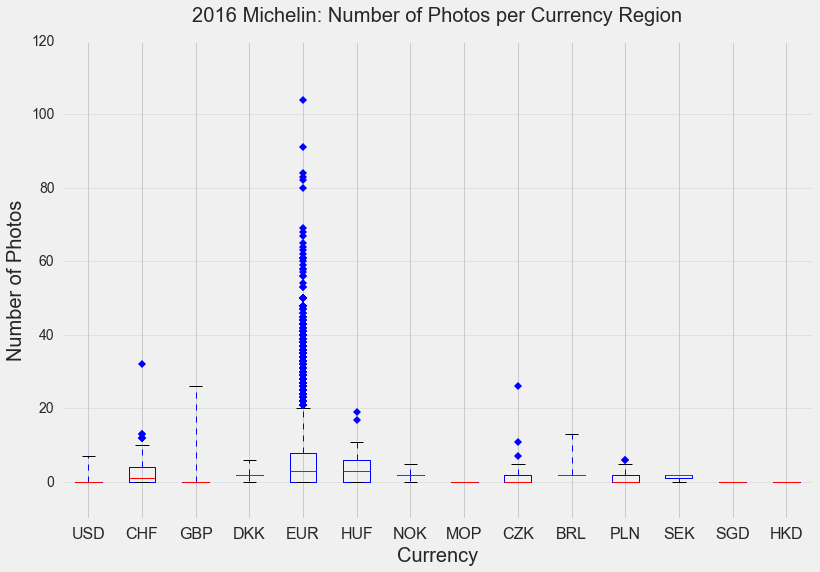

In [245]:
data = [df_USD['photo_count'], 
        df_CHF['photo_count'], 
        df_GBP['photo_count'],
        df_DKK['photo_count'],
        df_EUR['photo_count'],
        df_HUF['photo_count'],
        df_NOK['photo_count'],
        df_MOP['photo_count'],
        df_CZK['photo_count'],
        df_BRL['photo_count'],
        df_PLN['photo_count'],
        df_SEK['photo_count'],
        df_SGD['photo_count'],
        df_HKD['photo_count']]

plt.style.use('fivethirtyeight')
fig, ax1 = plt.subplots(figsize=(12, 8))
fig.canvas.set_window_title('')
plt.subplots_adjust(\
#                    left=0.075, right=0.95, top=0.9, bottom=0.25\
                   )

bp = plt.boxplot(data, 0, 'gD')

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set_axisbelow(True)
ax1.set_title('2016 Michelin: Number of Photos per Currency Region', y =1.03)
ax1.set_xlabel('Currency', fontsize = 20)
ax1.set_ylabel('Number of Photos', fontsize = 20)

# Set the axes ranges and axes labels
numBoxes = len(conversion_rate.keys())
ax1.set_xlim(0.5, numBoxes + 0.5)
ax1.set_ylim(-10, 120)
xtickNames = plt.setp(ax1, xticklabels=conversion_rate.keys())
     
plt.setp(xtickNames, fontsize=16)

plt.show()

In [246]:
df[df['photo_count'] > 100]

,name,cuisine,blurb,currency,photos,add_info,num_words,photo_count,latitude,longitude,...,parking,dinner_only,wheelchair,private_dining,with_rooms,booking,lunch_only,tennis,dinner_tasting,valet
927,Flocons de Sel,Creative,A group of chalets overlooking Megève... It is...,EUR,[https://download.viamichelin.com/images/miche...,"[Menu 99 € (lunch), 215/390 € - Carte 115/230 ...",63,104,45.82354,6.60007,...,1,0,1,0,0,0,0,0,0,1


In [247]:
df_CHF[df_CHF['photo_count'] > 20][['name', 'cuisine', 'photo_count', 'stars']]

,name,cuisine,photo_count,stars
14576,Vivanda,Modern,32,1


In [248]:
df.ix[14524, :]['add_info']

['Menu 80/150 \xe2\x82\xac',
 'dinner only - set menu only',
 'Park or Garden',
 'Meals outside',
 'Wheelchair accessible',
 'Air conditioning',
 'No dogs allowed',
 'Enclosed car park',
 'Address carret. Ma 1032, 07196 es Capdell\xc3\xa0',
 'Phone +34971138627',
 'Email zaranda@zaranda.es',
 'Website: http://www.zaranda.es']

In [249]:
df_CZK[df_CZK['photo_count'] > 20][['name', 'cuisine', 'photo_count', 'stars']]

,name,cuisine,photo_count,stars
3675,Alcron,modern,26,1


In [251]:
df.ix[3675, :]['add_info']

['Menu 1100/2300 CZK',
 'booking essential',
 'Air conditioning',
 'Enclosed car park',
 'Address \xc5\xa0tep\xc3\xa1nsk\xc3\xa1 40, 110 00 Praha',
 'Phone +420222820000',
 'Email alcron@radissonblu.com',
 'Website: http://www.alcron.cz']

I can't.

In [252]:
Image(url= "https://download.viamichelin.com/media/image2/XL/7r/me/Ii/nLT96mtZbYvpUlNw.jpg")

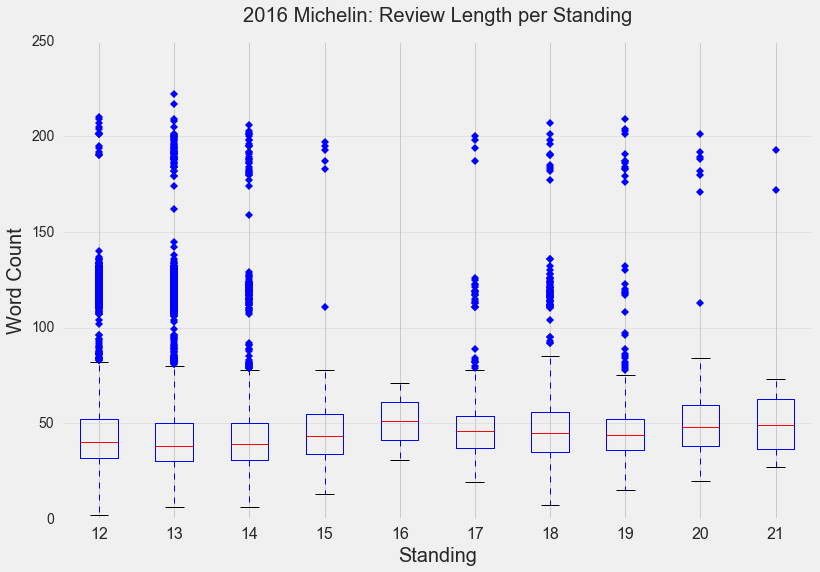

In [253]:
data = [df[df['standing'] == 12]['num_words'], 
        df[df['standing'] == 13]['num_words'], 
        df[df['standing'] == 14]['num_words'],
        df[df['standing'] == 15]['num_words'],
        df[df['standing'] == 16]['num_words'],
        df[df['standing'] == 17]['num_words'],
        df[df['standing'] == 18]['num_words'],
        df[df['standing'] == 19]['num_words'],
        df[df['standing'] == 20]['num_words'],
        df[df['standing'] == 21]['num_words']]

plt.style.use('fivethirtyeight')
fig, ax1 = plt.subplots(figsize=(12, 8))
fig.canvas.set_window_title('')
plt.subplots_adjust(\
#                    left=0.075, right=0.95, top=0.9, bottom=0.25\
                   )

bp = plt.boxplot(data, 0, 'gD')

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set_axisbelow(True)
ax1.set_title('2016 Michelin: Review Length per Standing', y =1.03)
ax1.set_xlabel('Standing', fontsize = 20)
ax1.set_ylabel('Word Count', fontsize = 20)

# Set the axes ranges and axes labels
# numBoxes = 5
# ax1.set_xlim(0.5, numBoxes + 0.5)
# ax1.set_ylim(90, 230)
xtickNames = plt.setp(ax1, xticklabels=['12', '13', '14', '15', '16', '17', '18', '19', '20', '21'])
     
plt.setp(xtickNames, fontsize=16)

plt.show()

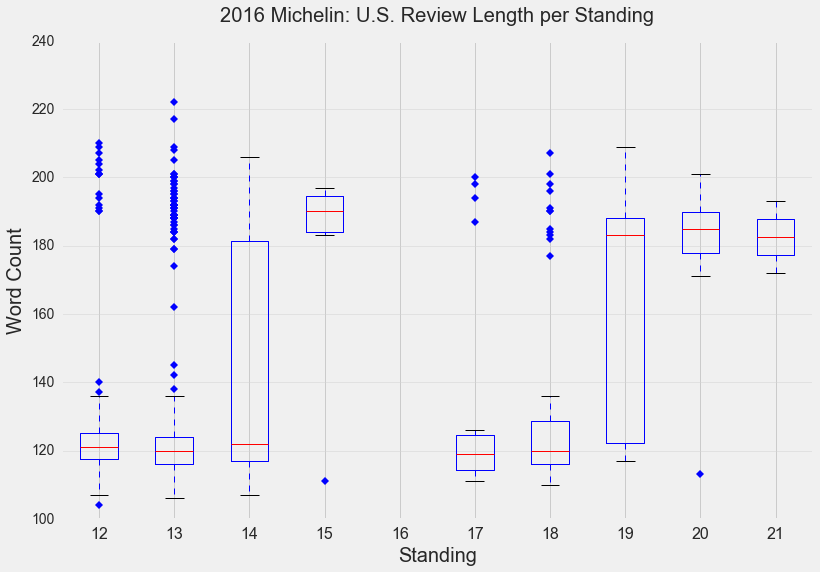

In [254]:
data = [df_USD[df_USD['standing'] == 12]['num_words'], 
        df_USD[df_USD['standing'] == 13]['num_words'], 
        df_USD[df_USD['standing'] == 14]['num_words'],
        df_USD[df_USD['standing'] == 15]['num_words'],
        df_USD[df_USD['standing'] == 16]['num_words'],
        df_USD[df_USD['standing'] == 17]['num_words'],
        df_USD[df_USD['standing'] == 18]['num_words'],
        df_USD[df_USD['standing'] == 19]['num_words'],
        df_USD[df_USD['standing'] == 20]['num_words'],
        df_USD[df_USD['standing'] == 21]['num_words']]

plt.style.use('fivethirtyeight')
fig, ax1 = plt.subplots(figsize=(12, 8))
fig.canvas.set_window_title('')
plt.subplots_adjust(\
#                    left=0.075, right=0.95, top=0.9, bottom=0.25\
                   )

bp = plt.boxplot(data, 0, 'gD')

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set_axisbelow(True)
ax1.set_title('2016 Michelin: U.S. Review Length per Standing', y =1.03)
ax1.set_xlabel('Standing', fontsize = 20)
ax1.set_ylabel('Word Count', fontsize = 20)

# Set the axes ranges and axes labels
#numBoxes = 5
#ax1.set_xlim(0.5, numBoxes + 0.5)
#ax1.set_ylim(-10, 450)
xtickNames = plt.setp(ax1, xticklabels=['12', '13', '14', '15', '16', '17', '18', '19', '20', '21'])
     
plt.setp(xtickNames, fontsize=16)

plt.show()

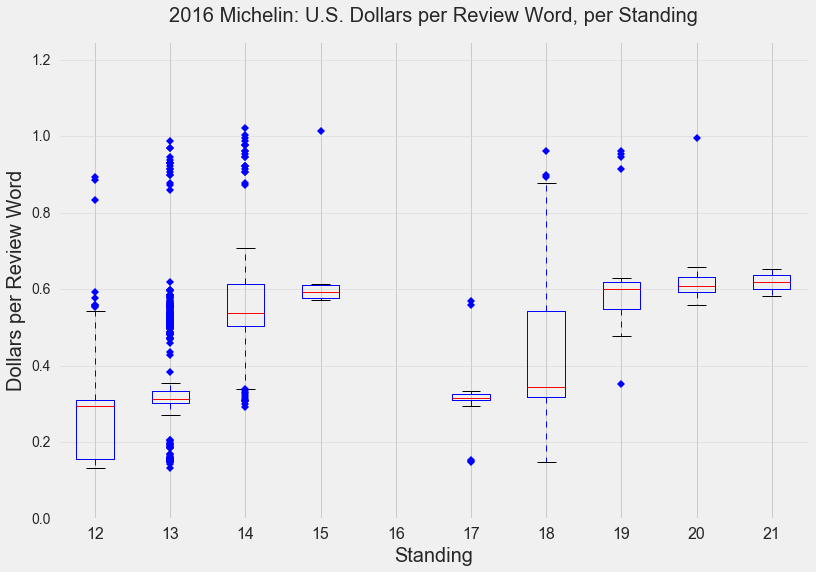

In [259]:
data = [df_USD[df_USD['standing'] == 12]['avg_USD']/df_USD[df_USD['standing'] == 12]['num_words'], 
        df_USD[df_USD['standing'] == 13]['avg_USD']/df_USD[df_USD['standing'] == 13]['num_words'], 
        df_USD[df_USD['standing'] == 14]['avg_USD']/df_USD[df_USD['standing'] == 14]['num_words'],
        df_USD[df_USD['standing'] == 15]['avg_USD']/df_USD[df_USD['standing'] == 15]['num_words'],
        df_USD[df_USD['standing'] == 16]['avg_USD']/df_USD[df_USD['standing'] == 16]['num_words'],
        df_USD[df_USD['standing'] == 17]['avg_USD']/df_USD[df_USD['standing'] == 17]['num_words'],
        df_USD[df_USD['standing'] == 18]['avg_USD']/df_USD[df_USD['standing'] == 18]['num_words'],
        df_USD[df_USD['standing'] == 19]['avg_USD']/df_USD[df_USD['standing'] == 19]['num_words'],
        df_USD[df_USD['standing'] == 20]['avg_USD']/df_USD[df_USD['standing'] == 20]['num_words'],
        df_USD[df_USD['standing'] == 21]['avg_USD']/df_USD[df_USD['standing'] == 21]['num_words']]

plt.style.use('fivethirtyeight')
fig, ax1 = plt.subplots(figsize=(12, 8))
fig.canvas.set_window_title('')
plt.subplots_adjust(\
#                    left=0.075, right=0.95, top=0.9, bottom=0.25\
                   )

bp = plt.boxplot(data, 0, 'gD')

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set_axisbelow(True)
ax1.set_title('2016 Michelin: U.S. Dollars per Review Word, per Standing', y =1.03)
ax1.set_xlabel('Standing', fontsize = 20)
ax1.set_ylabel('Dollars per Review Word', fontsize = 20)

# Set the axes ranges and axes labels
#numBoxes = 5
#ax1.set_xlim(0.5, numBoxes + 0.5)
ax1.set_ylim(0, 1.25)
xtickNames = plt.setp(ax1, xticklabels=['12', '13', '14', '15', '16', '17', '18', '19', '20', '21'])
     
plt.setp(xtickNames, fontsize=16)

plt.show()

What's that restaurant at standing 20 with fewer than 120 words?

In [224]:
df_USD[(df_USD['standing'] == 20) & (df_USD['num_words'] < 120)][['name', 'cuisine', 'stars']]

,name,cuisine,stars
11741,The Four Seasons,American,0


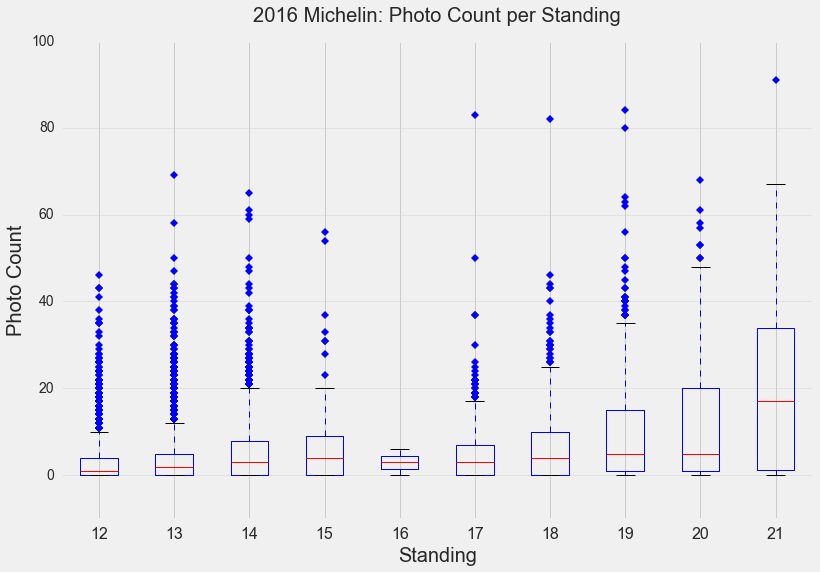

In [279]:
data = [df[df['standing'] == 12]['photo_count'], 
        df[df['standing'] == 13]['photo_count'], 
        df[df['standing'] == 14]['photo_count'],
        df[df['standing'] == 15]['photo_count'],
        df[df['standing'] == 16]['photo_count'],
        df[df['standing'] == 17]['photo_count'],
        df[df['standing'] == 18]['photo_count'],
        df[df['standing'] == 19]['photo_count'],
        df[df['standing'] == 20]['photo_count'],
        df[df['standing'] == 21]['photo_count']]

plt.style.use('fivethirtyeight')
fig, ax1 = plt.subplots(figsize=(12, 8))
fig.canvas.set_window_title('')
plt.subplots_adjust(\
#                    left=0.075, right=0.95, top=0.9, bottom=0.25\
                   )

bp = plt.boxplot(data, 0, 'gD')

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set_axisbelow(True)
ax1.set_title('2016 Michelin: Photo Count per Standing', y =1.03)
ax1.set_xlabel('Standing', fontsize = 20)
ax1.set_ylabel('Photo Count', fontsize = 20)

# Set the axes ranges and axes labels
numBoxes = len(data)
ax1.set_xlim(0.5, numBoxes + 0.5)
ax1.set_ylim(-10, 100)
xtickNames = plt.setp(ax1, xticklabels=['12', '13', '14', '15', '16', '17', '18', '19', '20', '21'])
     
plt.setp(xtickNames, fontsize=16)

plt.show()

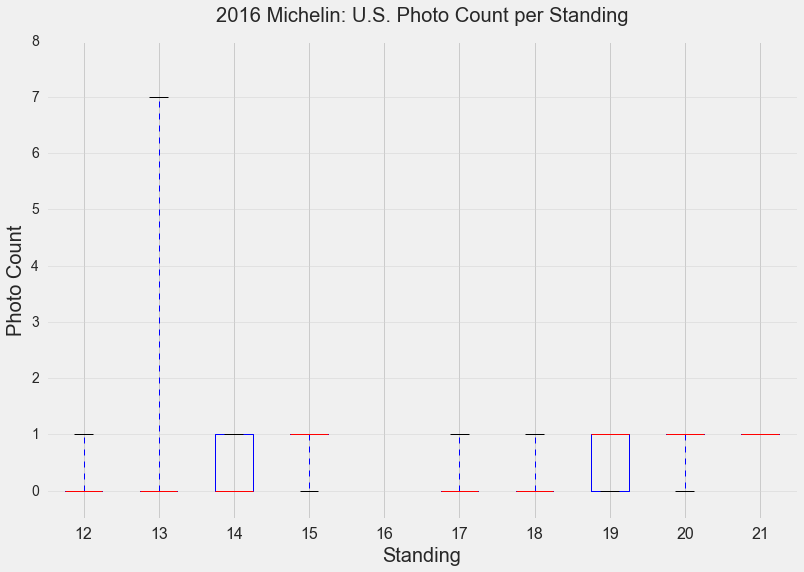

In [340]:
data = [df_USD[df_USD['standing'] == 12]['photo_count'], 
        df_USD[df_USD['standing'] == 13]['photo_count'], 
        df_USD[df_USD['standing'] == 14]['photo_count'],
        df_USD[df_USD['standing'] == 15]['photo_count'],
        df_USD[df_USD['standing'] == 16]['photo_count'],
        df_USD[df_USD['standing'] == 17]['photo_count'],
        df_USD[df_USD['standing'] == 18]['photo_count'],
        df_USD[df_USD['standing'] == 19]['photo_count'],
        df_USD[df_USD['standing'] == 20]['photo_count'],
        df_USD[df_USD['standing'] == 21]['photo_count']]

plt.style.use('fivethirtyeight')
fig, ax1 = plt.subplots(figsize=(12, 8))
fig.canvas.set_window_title('')
plt.subplots_adjust(\
#                    left=0.075, right=0.95, top=0.9, bottom=0.25\
                   )

bp = plt.boxplot(data, 0, 'gD')

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set_axisbelow(True)
ax1.set_title('2016 Michelin: U.S. Photo Count per Standing', y =1.03)
ax1.set_xlabel('Standing', fontsize = 20)
ax1.set_ylabel('Photo Count', fontsize = 20)

# Set the axes ranges and axes labels
numBoxes = len(data)
ax1.set_xlim(0.5, numBoxes + 0.5)
ax1.set_ylim(-0.5, 8)
xtickNames = plt.setp(ax1, xticklabels=['12', '13', '14', '15', '16', '17', '18', '19', '20', '21'])
     
plt.setp(xtickNames, fontsize=16)

plt.show()

Wow, not a lot of photos per U.S. restaurant!  Who has the most?

In [281]:
df_USD[df_USD['photo_count'] > 2][['name', 'cuisine', 'photo_count']]

,name,cuisine,photo_count
11558,The Kenwood,Californian,7
12695,Café China,Chinese,6


Great capture at Café China, nice work:

In [282]:
Image(url= "https://download.viamichelin.com/media/image2/XL/F7/OC/hi/RfTViXiaYq4NHq7A.jpg")

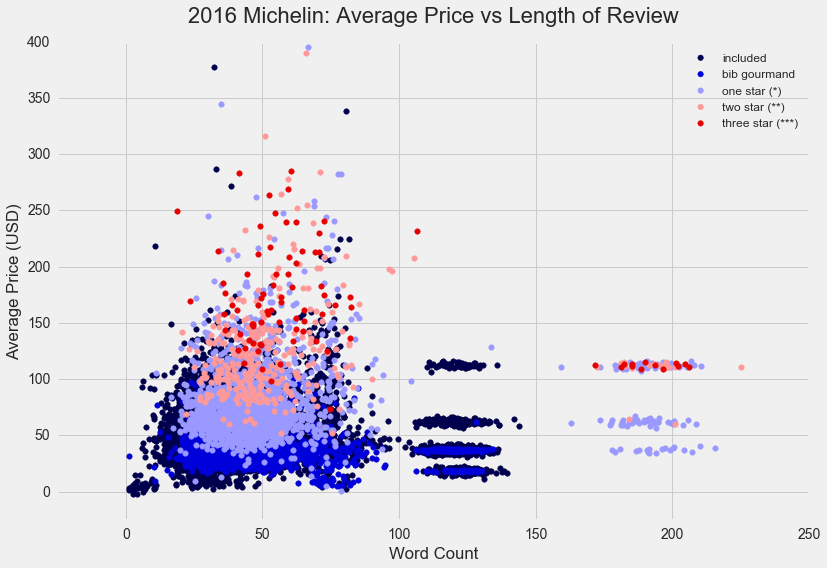

In [285]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

distinction_colors = []
for i in range(0, 256, 256/5):
    distinction_colors.append(cm.seismic(i))

def rand_jitter(arr):
    stdev = .005*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev    
    
## DO NOT USE THESE SLICES ELSEWHERE they're missing standing == 0
df_incl = df[df['included'] == 1]
df_1 = df[df['stars'] == 1]
df_2 = df[df['stars'] == 2]
df_3 = df[df['stars'] == 3]
df_bib = df[df['bib'] == 1]

plt.scatter(rand_jitter(df_incl['num_words']), rand_jitter(df_incl['avg_USD']), color = distinction_colors[0], \
            alpha = 1, s = 30, label = 'included')
plt.scatter(rand_jitter(df_bib['num_words']), rand_jitter(df_bib['avg_USD']), color = distinction_colors[1], \
            alpha = 1, s = 30, label = 'bib gourmand')
plt.scatter(rand_jitter(df_1['num_words']), rand_jitter(df_1['avg_USD']), color = distinction_colors[2], \
            alpha = 1, s = 30, label = 'one star (*)')
plt.scatter(rand_jitter(df_2['num_words']), rand_jitter(df_2['avg_USD']), color = distinction_colors[3], \
            alpha = 1, s = 30, label = 'two star (**)')
plt.scatter(rand_jitter(df_3['num_words']), rand_jitter(df_3['avg_USD']), color = distinction_colors[4], \
            alpha = 1, s = 30, label = 'three star (***)')



plt.title('2016 Michelin: Average Price vs Length of Review', fontsize = 22, y = 1.03)

# y label
plt.ylabel('Average Price (USD)')

# x label
plt.xlabel('Word Count')

# set the figure boundaries
plt.ylim([-25, 400])
plt.xlim([-25, 250])
plt.grid(True)
plt.legend(loc='upper right', fontsize = 12)

plt.show()

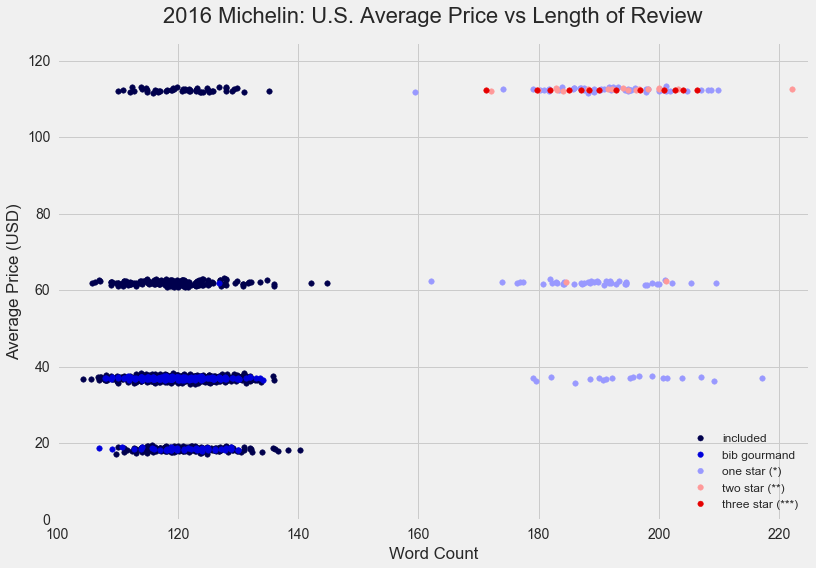

In [286]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

distinction_colors = []
for i in range(0, 256, 256/5):
    distinction_colors.append(cm.seismic(i))

def rand_jitter(arr):
    stdev = .005*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev    
    
plt.scatter(rand_jitter(df_incl_USD['num_words']), rand_jitter(df_incl_USD['avg_USD']), color = distinction_colors[0], \
            alpha = 1, s = 30, label = 'included')
plt.scatter(rand_jitter(df_bib_USD['num_words']), rand_jitter(df_bib_USD['avg_USD']), color = distinction_colors[1], \
            alpha = 1, s = 30, label = 'bib gourmand')
plt.scatter(rand_jitter(df_1_USD['num_words']), rand_jitter(df_1_USD['avg_USD']), color = distinction_colors[2], \
            alpha = 1, s = 30, label = 'one star (*)')
plt.scatter(rand_jitter(df_2_USD['num_words']), rand_jitter(df_2_USD['avg_USD']), color = distinction_colors[3], \
            alpha = 1, s = 30, label = 'two star (**)')
plt.scatter(rand_jitter(df_3_USD['num_words']), rand_jitter(df_3_USD['avg_USD']), color = distinction_colors[4], \
            alpha = 1, s = 30, label = 'three star (***)')



plt.title('2016 Michelin: U.S. Average Price vs Length of Review', fontsize = 22, y = 1.03)

# y label
plt.ylabel('Average Price (USD)')

# x label
plt.xlabel('Word Count')

# set the figure boundaries
plt.ylim([0, 125])
plt.xlim([100, 225])
plt.grid(True)
plt.legend(loc='lower right', fontsize = 12)

plt.show()

U.S. price ranges are much more granular than non-U.S. ones!  They're all clustered around a few y-values.

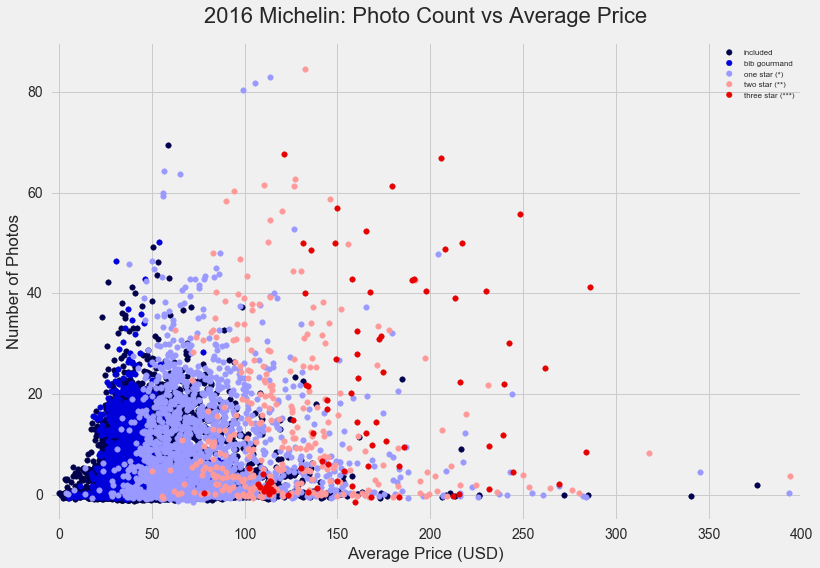

In [287]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

distinction_colors = []
for i in range(0, 256, 256/5):
    distinction_colors.append(cm.seismic(i))

def rand_jitter(arr):
    stdev = .005*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev    
    
df_incl = df[df['included'] == 1]
df_1 = df[df['stars'] == 1]
df_2 = df[df['stars'] == 2]
df_3 = df[df['stars'] == 3]
df_bib = df[df['bib'] == 1]

plt.scatter(rand_jitter(df_incl['avg_USD']), rand_jitter(df_incl['photo_count']), \
            color = distinction_colors[0], alpha = 1, s = 30, label = 'included')
plt.scatter(rand_jitter(df_bib['avg_USD']), rand_jitter(df_bib['photo_count']), \
            color = distinction_colors[1], alpha = 1, s = 30, label = 'bib gourmand')
plt.scatter(rand_jitter(df_1['avg_USD']), rand_jitter(df_1['photo_count']), \
            color = distinction_colors[2], alpha = 1, s = 30, label = 'one star (*)')
plt.scatter(rand_jitter(df_2['avg_USD']), rand_jitter(df_2['photo_count']), \
            color = distinction_colors[3], alpha = 1, s = 30, label = 'two star (**)')
plt.scatter(rand_jitter(df_3['avg_USD']), rand_jitter(df_3['photo_count']), \
            color = distinction_colors[4], alpha = 1, s = 30, label = 'three star (***)')



plt.title('2016 Michelin: Photo Count vs Average Price', fontsize = 22, y = 1.03)

# y label
plt.ylabel('Number of Photos')

# x label
plt.xlabel('Average Price (USD)')

# set the figure boundaries
plt.ylim([-5, 90])
plt.xlim([-5, 400])
plt.grid(True)
plt.legend(loc='upper right', fontsize = 8)

plt.show()

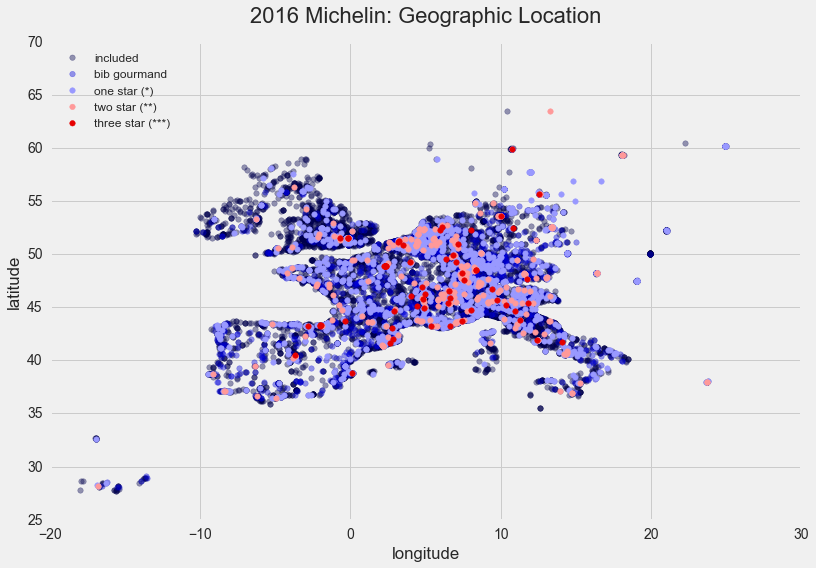

In [297]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

distinction_colors = []
for i in range(0, 256, 256/5):
    distinction_colors.append(cm.seismic(i))


df_incl = df[(df['stars'] == 0) & (df['bib'] == 0)]
df_1 = df[df['stars'] == 1]
df_2 = df[df['stars'] == 2]
df_3 = df[df['stars'] == 3]
df_bib = df[df['bib'] == 1]

plt.scatter(df_incl['longitude'], df_incl['latitude'], color = distinction_colors[0], alpha = 0.4, s = 30, label = 'included')
plt.scatter(df_bib['longitude'], df_bib['latitude'], color = distinction_colors[1], alpha = 0.4, s = 30, label = 'bib gourmand')
plt.scatter(df_1['longitude'], df_1['latitude'], color = distinction_colors[2], alpha = 1, s = 30, label = 'one star (*)')
plt.scatter(df_2['longitude'], df_2['latitude'], color = distinction_colors[3], alpha = 1, s = 30, label = 'two star (**)')
plt.scatter(df_3['longitude'], df_3['latitude'], color = distinction_colors[4], alpha = 1, s = 30, label = 'three star (***)')



plt.title('2016 Michelin: Geographic Location', fontsize = 22, y = 1.03)

# y label
plt.ylabel('latitude')

# x label
plt.xlabel('longitude')

# set the figure boundaries
plt.ylim([25, 70])
plt.xlim([-20, 30])
plt.grid(True)
plt.legend(loc='upper left', fontsize = 12)

plt.show()

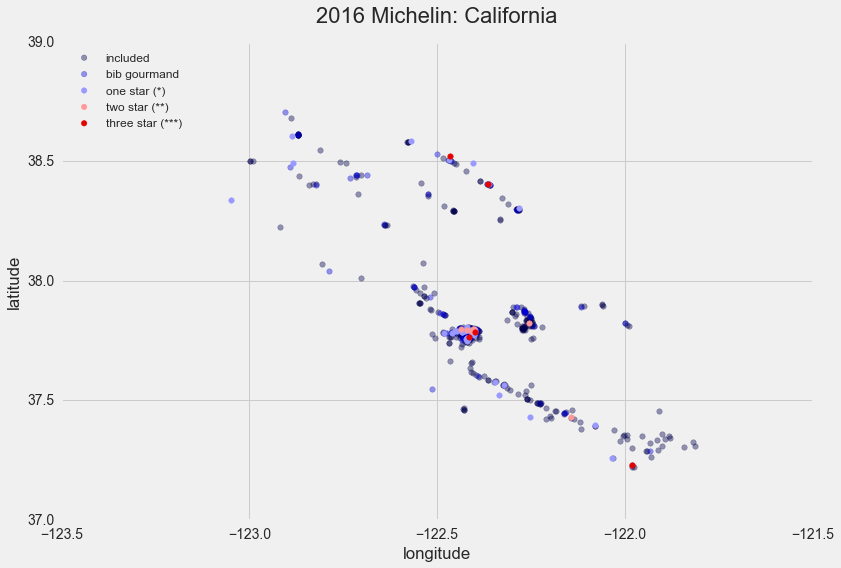

In [305]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

distinction_colors = []
for i in range(0, 256, 256/5):
    distinction_colors.append(cm.seismic(i))


df_incl = df[(df['stars'] == 0) & (df['bib'] == 0)]
df_1 = df[df['stars'] == 1]
df_2 = df[df['stars'] == 2]
df_3 = df[df['stars'] == 3]
df_bib = df[df['bib'] == 1]

plt.scatter(df_incl['longitude'], df_incl['latitude'], color = distinction_colors[0], alpha = 0.4, s = 30, label = 'included')
plt.scatter(df_bib['longitude'], df_bib['latitude'], color = distinction_colors[1], alpha = 0.4, s = 30, label = 'bib gourmand')
plt.scatter(df_1['longitude'], df_1['latitude'], color = distinction_colors[2], alpha = 1, s = 30, label = 'one star (*)')
plt.scatter(df_2['longitude'], df_2['latitude'], color = distinction_colors[3], alpha = 1, s = 30, label = 'two star (**)')
plt.scatter(df_3['longitude'], df_3['latitude'], color = distinction_colors[4], alpha = 1, s = 30, label = 'three star (***)')



plt.title('2016 Michelin: California', fontsize = 22, y = 1.03)

# y label
plt.ylabel('latitude')

# x label
plt.xlabel('longitude')

# set the figure boundaries
plt.ylim([37, 39])
plt.xlim([-123.5, -121.5])
plt.grid(True)
plt.legend(loc='upper left', fontsize = 12)

plt.show()

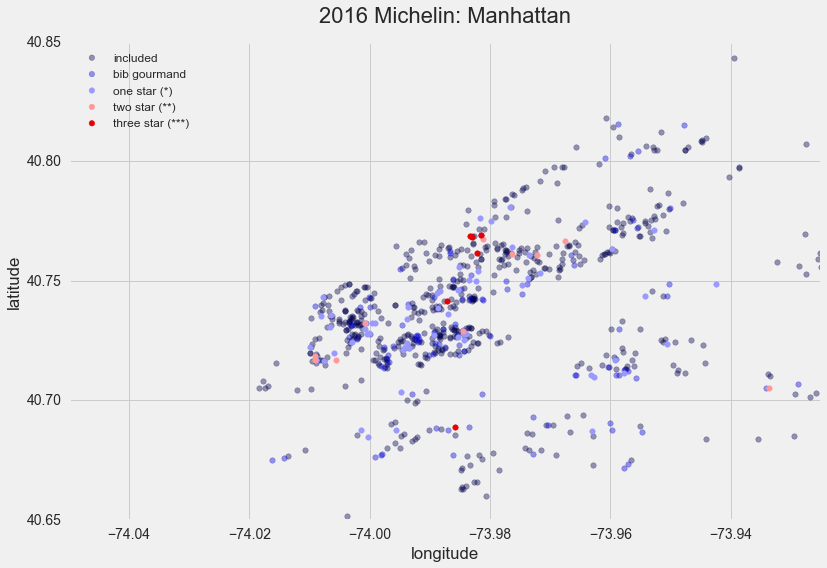

In [319]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

distinction_colors = []
for i in range(0, 256, 256/5):
    distinction_colors.append(cm.seismic(i))


df_incl = df[(df['stars'] == 0) & (df['bib'] == 0)]
df_1 = df[df['stars'] == 1]
df_2 = df[df['stars'] == 2]
df_3 = df[df['stars'] == 3]
df_bib = df[df['bib'] == 1]

plt.scatter(df_incl['longitude'], df_incl['latitude'], color = distinction_colors[0], alpha = 0.4, s = 30, label = 'included')
plt.scatter(df_bib['longitude'], df_bib['latitude'], color = distinction_colors[1], alpha = 0.4, s = 30, label = 'bib gourmand')
plt.scatter(df_1['longitude'], df_1['latitude'], color = distinction_colors[2], alpha = 1, s = 30, label = 'one star (*)')
plt.scatter(df_2['longitude'], df_2['latitude'], color = distinction_colors[3], alpha = 1, s = 30, label = 'two star (**)')
plt.scatter(df_3['longitude'], df_3['latitude'], color = distinction_colors[4], alpha = 1, s = 30, label = 'three star (***)')



plt.title('2016 Michelin: Manhattan', fontsize = 22, y = 1.03)

# y label
plt.ylabel('latitude')

# x label
plt.xlabel('longitude')

# set the figure boundaries
plt.ylim([40.65, 40.85])
plt.xlim([-74.05, -73.925])
plt.grid(True)
plt.legend(loc='upper left', fontsize = 12)

plt.show()

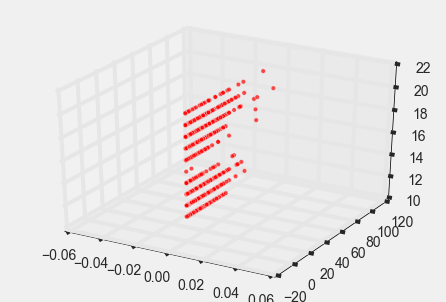

In [320]:
import pylab
from mpl_toolkits.mplot3d import Axes3D

fig = pylab.figure()
ax = Axes3D(fig)
ax.scatter(\
           #df['num_words']
           [0]*len(df), df['photo_count'], df['standing'], zdir='z',c='red', alpha=.7)
plt.show()

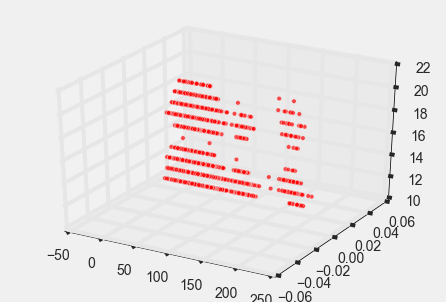

In [321]:
import pylab
from mpl_toolkits.mplot3d import Axes3D

fig = pylab.figure()
ax = Axes3D(fig)
ax.scatter(df['num_words'], [0]*len(df), \
           #df['photo_count'], 
           df['standing'], zdir='z',c='red', alpha=.7)
plt.show()

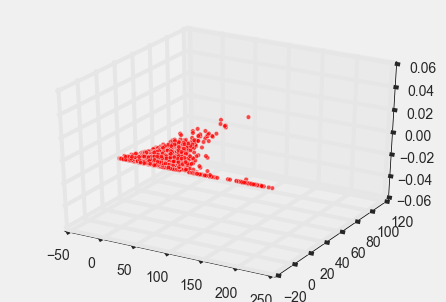

In [322]:
import pylab
from mpl_toolkits.mplot3d import Axes3D

fig = pylab.figure()
ax = Axes3D(fig)
ax.scatter(df['num_words'], df['photo_count'], [0]*len(df)\
           #, df['standing']
           , zdir='z',c='red', alpha=.7)
plt.show()

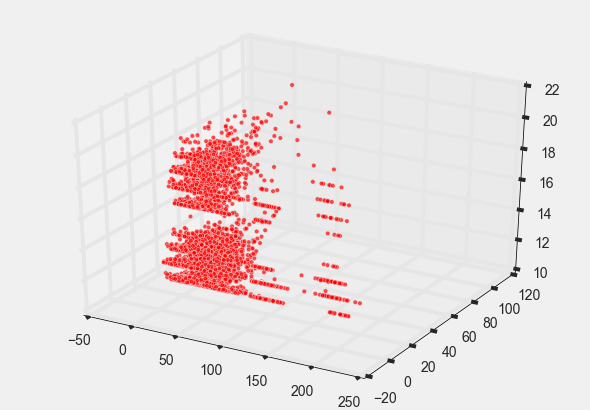

In [262]:
import pylab
from mpl_toolkits.mplot3d import Axes3D

fig = pylab.figure()
ax = Axes3D(fig)
ax.scatter(df['num_words'], df['photo_count'],
            df['standing']
           , zdir='z',c='red', alpha=.7)
plt.show()

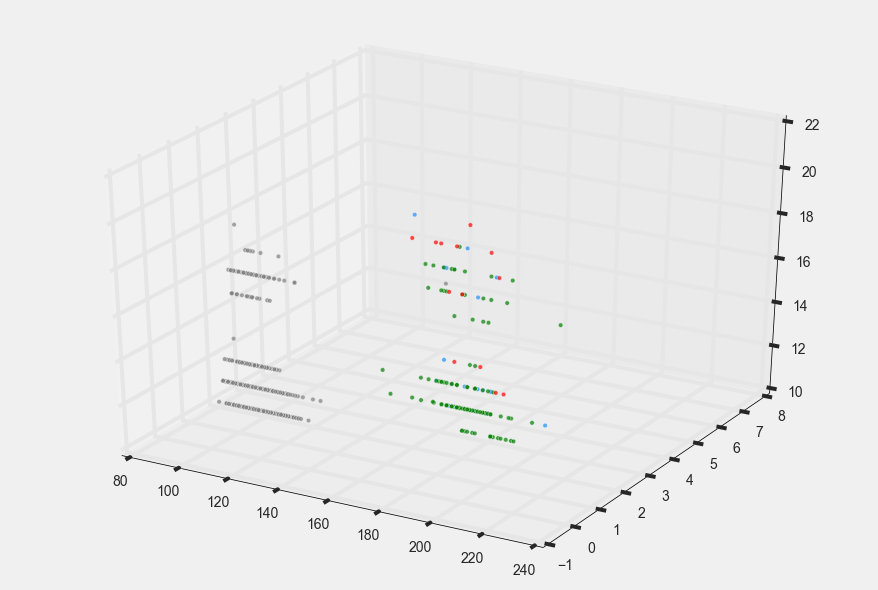

In [356]:
import pylab
from mpl_toolkits.mplot3d import Axes3D

fig = pylab.figure(figsize = (12,8))
ax = Axes3D(fig)
ax.scatter(df_3_USD['num_words'], df_3_USD['photo_count'], df_3_USD['standing'], zdir='z',c='red', alpha=.7)
ax.scatter(df_2_USD['num_words'], df_2_USD['photo_count'], df_2_USD['standing'], zdir='z',c='dodgerblue', alpha=.7)
ax.scatter(df_1_USD['num_words'], df_1_USD['photo_count'], df_1_USD['standing'], zdir='z',c='green', alpha=.7)
ax.scatter(df_incl_USD['num_words'], df_incl_USD['photo_count'], df_incl_USD['standing'], zdir='z',c='grey', alpha=.7)
plt.show()

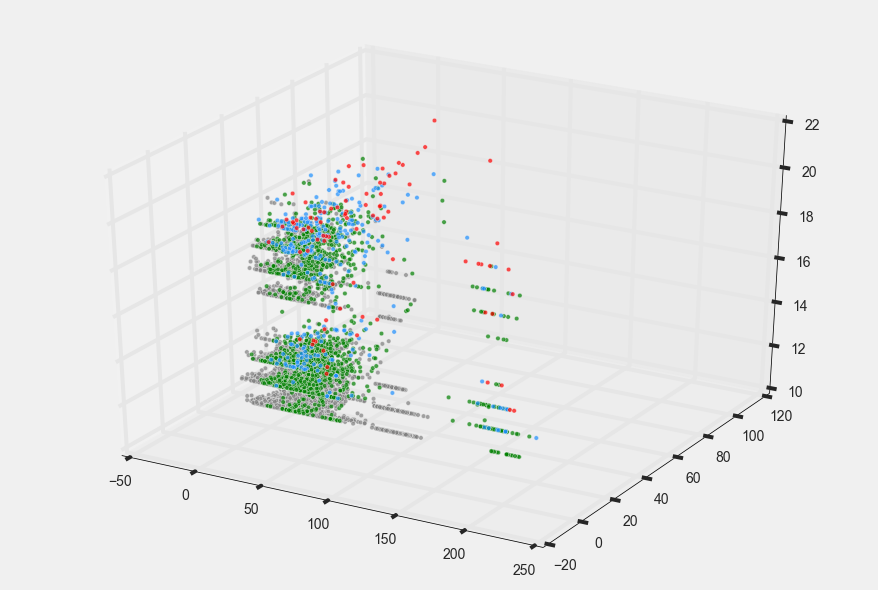

In [370]:
import pylab
from mpl_toolkits.mplot3d import Axes3D

fig = pylab.figure(figsize = (12,8))
ax = Axes3D(fig)
ax.scatter(df_3['num_words'], df_3['photo_count'], df_3['standing'], zdir='z',c='red', alpha=.7)
ax.scatter(df_2['num_words'], df_2['photo_count'], df_2['standing'], zdir='z',c='dodgerblue', alpha=.7)
ax.scatter(df_1['num_words'], df_1['photo_count'], df_1['standing'], zdir='z',c='green', alpha=.7)
ax.scatter(df_incl['num_words'], df_incl['photo_count'], df_incl['standing'], zdir='z',c='grey', alpha=.7)
plt.show()

In [267]:
standing_list = []
for i in range(len(df['standing'].unique())):
    standing_list.append(df['standing'].unique()[i])


standing_order = range(len(df['standing'].unique()))

standing_dict = dict(zip(standing_list, standing_order))

ystand = pd.DataFrame(df['standing'].value_counts())
y1stand = pd.DataFrame(df[df['stars'] == 1]['standing'].value_counts())
y2stand = pd.DataFrame(df[df['stars'] == 2]['standing'].value_counts())
y3stand = pd.DataFrame(df[df['stars'] == 3]['standing'].value_counts())
ybibstand = pd.DataFrame(df[df['bib'] == 1]['standing'].value_counts())
y0stand = pd.DataFrame(df[df['included'] == 1]['standing'].value_counts())
big_ystand = pd.concat([ystand, y0stand, ybibstand, y1stand, y2stand, y3stand], axis = 1)
big_ystand.columns = ['all', 'inclusion', 'bib gourmand', 'one-star', 'two-star', 'three-star']
big_ystand['standing'] = big_ystand.index
big_ystand = big_ystand.reset_index(drop = True)
big_ystand = big_ystand[big_ystand['standing'] != 0]
standing_order = range(len(df['standing'].unique()))

big_ystand_dict = dict(zip(standing_list, standing_order))

big_ystand = big_ystand.set_index('standing', drop = True)

big_ystand = big_ystand.fillna(0)
big_ystand

,all,inclusion,bib gourmand,one-star,two-star,three-star
standing,,,,,,
12.0,6184,4733,1340.0,111,0.0,0.0
13.0,7539,5951,1041.0,529,18.0,0.0
14.0,1732,1092,45.0,531,57.0,7.0
15.0,102,33,0.0,34,25.0,10.0
16.0,2,1,0.0,1,0.0,0.0
17.0,466,307,96.0,59,3.0,1.0
18.0,843,537,66.0,216,21.0,3.0
19.0,678,263,4.0,302,98.0,11.0
20.0,203,26,0.0,56,82.0,39.0


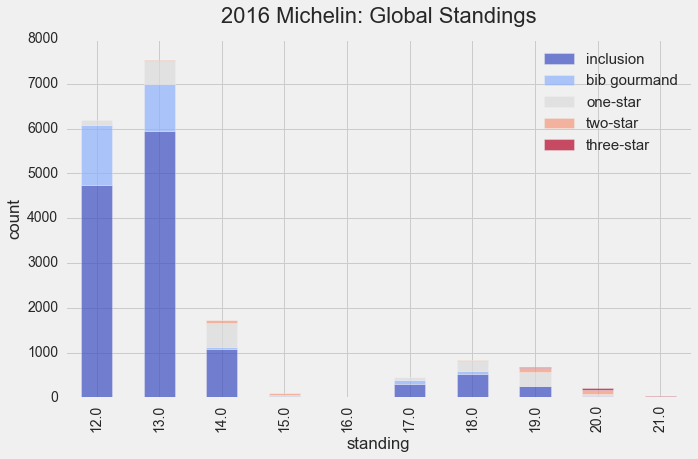

In [268]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

#big_ystand = big_ystand.sort('all', ascending = False)
big_ystand[['inclusion', 'bib gourmand', 'one-star', 'two-star', 'three-star']].plot(kind = 'bar', alpha = 0.7, \
                                                stacked = True, colormap = 'coolwarm', figsize = (10,6))

#standing_colors = []
# for i in range(0, 256, 256/len(df['standing'].unique())):
#     standing_colors.append(cm.coolwarm(i))


df_incl = df[df['included'] == 1]
df_1 = df[df['stars'] == 1]
df_2 = df[df['stars'] == 2]
df_3 = df[df['stars'] == 3]
df_bib = df[df['bib'] == 1]

plt.title('2016 Michelin: Global Standings', fontsize = 22, y = 1.03)

# y label
plt.ylabel('count')

# x label
plt.xlabel('standing')

# set the figure boundaries
# plt.ylim([40.6, 40.85])
# plt.xlim([-74.025, -73.925])
plt.grid(True)
plt.legend(loc='upper right', fontsize = 15)

plt.show()

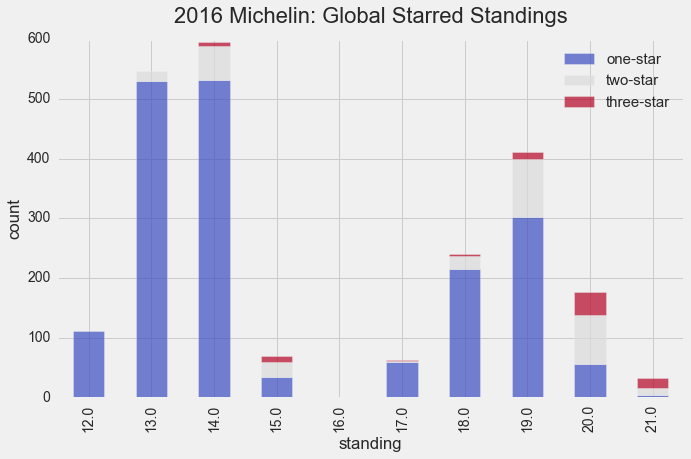

In [271]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

#big_ystand = big_ystand.sort('all', ascending = False)
big_ystand[['one-star', 'two-star', 'three-star']].plot(kind = 'bar', alpha = 0.7, \
                                                stacked = True, colormap = 'coolwarm', figsize = (10,6))

#standing_colors = []
# for i in range(0, 256, 256/len(df['standing'].unique())):
#     standing_colors.append(cm.coolwarm(i))


#df_incl = df[df['included'] == 1]
df_1 = df[df['stars'] == 1]
df_2 = df[df['stars'] == 2]
df_3 = df[df['stars'] == 3]
#df_bib = df[df['bib'] == 1]

plt.title('2016 Michelin: Global Starred Standings', fontsize = 22, y = 1.03)

# y label
plt.ylabel('count')

# x label
plt.xlabel('standing')

# set the figure boundaries
# plt.ylim([40.6, 40.85])
# plt.xlim([-74.025, -73.925])
plt.grid(True)
plt.legend(loc='upper right', fontsize = 15)

plt.show()

In [ ]:
def how_far_to_people(df):
    nearest_people = []
    for i in range(len(df['town'])):
        eat = df['lat_lon'][i]
        people = df['FILL IN TOWN COLUMN'][i]
        too_far = great_circle(eat, people).kilometers
        nearest_people.append(too_far)
    df['nearest_people'] = nearest_people
    return df

In [272]:
cPickle.dump(df, open('assets/big_df_model-ready.p', 'wb'))

In [329]:
df.columns

Index([u'name', u'cuisine', u'blurb', u'currency', u'photos', u'add_info',
       u'stars', u'name_len', u'name_count', u'high_price', u'low_price',
       u'num_words', u'photo_count', u'latitude', u'longitude', u'avg_USD',
       u'standing', u'bib', u'included', u'assiette', u'value_menu', u'BRL',
       u'CHF', u'CZK', u'DKK', u'EUR', u'GBP', u'HKD', u'HUF', u'MOP', u'NOK',
       u'PLN', u'SEK', u'SGD', u'USD', u'interesting_wine',
       u'french_english_wine', u'wine', u'view', u'garden', u'outside_dining',
       u'air_conditioning', u'no_dogs', u'parking', u'dinner_only',
       u'wheelchair', u'private_dining', u'with_rooms', u'booking',
       u'lunch_only', u'tennis', u'dinner_tasting', u'valet'],
      dtype='object')

In [334]:
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, \
    ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, \
    roc_auc_score, roc_curve
import matplotlib.patheffects as path_effects

In [371]:
y = df[['stars']]
X = df[['name_len', u'name_count', u'high_price', u'low_price',
       u'num_words', u'photo_count', u'latitude', u'longitude', u'avg_USD',
       u'standing', \
#        u'bib', u'included', \
        u'assiette', u'value_menu', u'BRL',
       u'CHF', u'CZK', u'DKK', u'EUR', u'GBP', u'HKD', u'HUF', u'MOP', u'NOK',
       u'PLN', u'SEK', u'SGD', u'USD', u'interesting_wine',
       u'french_english_wine', u'wine', u'view', u'garden', u'outside_dining',
       u'air_conditioning', u'no_dogs', u'parking', u'dinner_only',
       u'wheelchair', u'private_dining', u'with_rooms', u'booking',
       u'lunch_only', u'tennis', u'dinner_tasting', u'valet']]

In [336]:
y = df['stars']
X_scaled = MinMaxScaler().fit_transform(X.astype(float))
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
len(X_scaled.columns)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state = 42)

print "       X Shape  Y Shape"
print "Train", X_train.shape, y_train.shape
print "Test ", X_test.shape, y_test.shape

In [333]:
n = 50
plot_colors = []
for i in range(0, 256, 256/100):
    plot_colors.append(cm.coolwarm(i))

cv = KFold(len(X_train), n_folds = n, shuffle=False)

def do_plot(model, m=1):
    for fold, color in zip(cv, plot_colors):
        X_train = X_scaled.iloc[fold[0]]
        X_test  = X_scaled.iloc[fold[1]]
        y_train = y.iloc[fold[0]]
        y_test  = y.iloc[fold[1]]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
                
        plt.scatter(rand_jitter(y_pred), rand_jitter(y_test), color=color, s = 40)
        plt.plot([-0.01, 3.25],[-0.01, 3.25], linewidth = 0.1)
        plt.text(2.5, 3, "R^2: "+str(m), fontsize=16)
    return  

cmat.shape

NameError: name 'KFold' is not defined

In [332]:
def plot_confusion_matrix(cmat, title='Confusion matrix', cmap=plt.cm.Blues, \
                          labels = ['1', '2', '3']):
    
    plt.figure(figsize=(12,8))
    plt.imshow(cmat, interpolation='nearest', cmap=cmap)
    
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels)
    plt.yticks(tick_marks, labels)
        
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
    width, height = cmat.shape
    
    for x in xrange(width):
        for y in xrange(height):
            plt.annotate(str(cmat[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center',
                        color = 'white',
                        fontsize=18).set_path_effects([path_effects.Stroke(linewidth=1, 
                        foreground='black'), path_effects.Normal()]) 
    return

def getROCcurve(roc, title='ROC Curve', xlabel ='% of False Positives', \
                ylabel = '% of True Positives'):
    fpr, tpr, thresholds = roc
    
    fig,ax = plt.subplots()
    ax.plot(fpr, tpr, label='ROC Curve')

    fig.set_size_inches(7, 6, forward=True)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(loc='best')
    plt.plot([0, 1], [0, 1], 'k--', linewidth = 0.4, color = 'magenta')
    return

In [ ]:
dt = DecisionTreeClassifier()

scores = cross_val_score(dt, X_train, y_train, cv=cv)
scores.mean()

In [ ]:
plt.figure(figsize=(12,8))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Classifier: Actual vs Predicted', fontsize = 20, y = 1.05)
plt.style.use('fivethirtyeight')


do_plot(dt, scores.mean().round(2))

In [ ]:
dt.fit(X_scaled, y)
features = sorted(zip(map(lambda x: round(x, 4), dt.feature_importances_), X_scaled.columns), reverse=True)
features_dt = pd.DataFrame(features, columns = ['importance', 'feature'])
features_dt = features_dt.sort('importance', ascending = False)
features_dt = features_dt.set_index('feature', drop = True)

plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

features_dt[0:19].plot.bar(color = 'lightgreen')

plt.title('Decision Tree Classifier: Feature Importances', fontsize = 20, y = 1.03)

# y label
plt.ylabel('Coefficient', fontsize = 18)

# x label
plt.xlabel('Feature', fontsize = 12)
plt.axhline(0, color='black', alpha = 0.6)
plt.xticks(rotation = 90, fontsize = 13)

plt.ylim([0, 1])
plt.show()

In [ ]:
y_pred = dt.fit(X_train, y_train).predict(X_test)

pred1 = dt.predict_proba(X_train).T[1]

cmat = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cmat, title='2016 Michelin Stars: Decision Tree Classifier Confusion Matrix')

In [ ]:
def TheAccumulator(df):
    cumulative = []
    total = 0
    for i in range(len(df)):
        cumulative.append(total)
        total += df['importance'][i]
    df['sum'] = cumulative
    df = df.reset_index(drop = True)
    return df

features_dt = TheAccumulator(features_dt)
features_et = TheAccumulator(features_et)
features_gb = TheAccumulator(features_gb)
features_ab = TheAccumulator(features_ab)
features_rf = TheAccumulator(features_rf)

plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

plt.plot(features_dt.index, features_dt['sum'], color = 'Crimson', linewidth = 0.8, label = 'Decision Tree')
plt.plot(features_rf.index, features_rf['sum'], color = 'Orange', linewidth = 0.8, label = 'Random Forest')
plt.plot(features_et.index, features_et['sum'], color = 'DarkOliveGreen', linewidth = 0.8, label = 'Extra Trees')
plt.plot(features_ab.index, features_ab['sum'], color = 'blue', linewidth = 0.4, label = 'Ada Boost')
plt.plot(features_gb.index, features_gb['sum'], color = 'purple', linewidth = 0.8, label = 'Gradient Boost')
plt.axhline(0, color='black', alpha = 0.6)
plt.title('Tree-based Models for IMDb Top 250', fontsize = 20, y = 1.05)

# y label
plt.ylabel('Variance Explained, cumulative')

# x label
plt.xlabel('Index Number', y = 0.1)

plt.xlim([-1, 20])
plt.ylim([0.6, 1.04])
plt.legend(loc='center right', fontsize = 10)

plt.show()